<h1>Harnessing Customer Reviews: Generating Insights for the Aviation Industry
<h3>Final Assignment: Natural Language Processing and Text Analytics (CDSCO1002E) </h3>
    <p>May 28th, 2024</p>
    <p>Copenhagen Business School</p>
    <p>Antonia Strobl</p>
    <p>Luisa Thiemer</p>
    <p>David Hark</p>
    <p>Anna Marie Walter</p>
</center>

In [ ]:
!pip install pyLDAvis
!pip install geopy
!pip install gensim
!pip install spac
!pip install torch torchvision torchaudio
!pip install transformers requests
!pip install textblob
!pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement spac (from versions: none)
ERROR: No matching distribution found for spac
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# General imports for data handling and computation
import pandas as pd
import numpy as np
import re

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

# NLTK for natural language processing
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords, wordnet, sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk import pos_tag
nltk.download(['averaged_perceptron_tagger', 'sentiwordnet', 'punkt', 'stopwords', 'wordnet'])

# Machine Learning tools from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# TensorFlow and Keras for building neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from tensorflow import keras

# Sentiment analysis
from textblob import TextBlob
from afinn import Afinn
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import spacy
from collections import Counter

# Load the English NLP pipeline
nlp = spacy.load("en_core_web_sm")

# Topic Modelling
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
np.random.seed(2018)
import pyLDAvis.gensim_models
import pyLDAvis
from wordcloud import WordCloud, STOPWORDS

# Business Insights
import plotly.express as px
from ipywidgets import widgets, Output

# Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv('/content/Airline_Reviews.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**About the Dataset**

The dataset utilized in this study was retrieved from Kaggle (Pitroda, n.d.) and it contains 23171 rows and 24 features representing airplane reviews from customers. It is structured into 20 columns encapsulating a variety of features, including a detailed text review, where the reviewer shares their experiences, opinions, and feedback about the flying experience.


**The Variables**
- Airline Name: Indicates the airline being reviewed.
- Overall_Rating: Numerical or star rating provided by the reviewer to rate the airline overall.
- Review_Title: Short title or headline given by the reviewer to summarize the review content.
- Review Date: Date on which the review was written or posted.
- Verified: Binary indicator (Yes/No or True/False) showing whether the review is verified as coming from an actual passenger.
- Review: Detailed text where the reviewer shares their experience and opinions about the airline.
- Aircraft: Specifies the aircraft type or model used for the flight being reviewed.
- Type Of Traveller: Describes the category of the traveler (e.g., Business, Leisure, Solo, Family).
- Seat Type: Type of seat the reviewer had during the flight (e.g., Economy Class, Premium Economy, Business Class, First Class).
- Route: Specific route or flight path taken by the airline during the journey being reviewed.
- Date Flown: Date on which the flight took place.
- Seat Comfort: Rating given by the reviewer assessing the comfort level of the seats.
- Cabin Staff Service: Rating for the service provided by the cabin crew or flight attendants.
- Food & Beverages: Rating evaluating the quality and variety of food and beverages offered during the flight.
- Ground Service: Rating of the service provided by the airline's ground staff, including check-in and boarding procedures.
- Inflight Entertainment: Assesses the variety and quality of entertainment options available to passengers during the flight.
- Wifi & Connectivity: Evaluates the availability and quality of onboard WiFi and other connectivity options.
- Value For Money: Reviewer’s rating on whether the overall experience justified the cost of the ticket.
- Recommended: Indicates whether the reviewer recommends the airline based on their experience.




## Data Preprocessing

#### *Overview*

In [ ]:
# Show first ten rows of the dataset
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
5,5,Adria Airways,1,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,CR 900,Couple Leisure,Economy Class,Sarajevo to Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
6,6,Adria Airways,1,"""worse than the budget airlines""",6th September 2019,False,"Ljubljana to Zürich. Firstly, Ljubljana airp...",NaN,Business,Economy Class,Ljubljana to Zürich,September 2019,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no
7,7,Adria Airways,1,"""book another company""",24th August 2019,False,"First of all, I am not complaining about a s...",Bombardier CRJ,Solo Leisure,Economy Class,Timisoara to Munich,August 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
8,8,Adria Airways,1,"""combined two flights""",6th August 2019,True,Worst Airline ever! They combined two flight...,NaN,Solo Leisure,Economy Class,Pristina to Zürich via Ljubliana,August 2019,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no
9,9,Adria Airways,8,"""the crew was nice""",12th October 2018,True,Ljubljana to Munich. The homebase airport of ...,NaN,Family Leisure,Economy Class,Ljubljana to Munich,October 2018,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes


In [ ]:
# Compute the number of rows and columns
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} features')

The dataset contains 23171 rows and 20 features


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the summary statistics on variables
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618321,2.871609,2.553586,2.353738,2.178964,1.780405,2.451120
std,6689.03588,1.464844,1.604631,1.526314,1.595747,1.488758,1.318800,1.594125
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Check unique values for each variable
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Variable', 'Unique_Values']
unique_counts = unique_counts.iloc[0:]
unique_counts_df = pd.DataFrame(unique_counts)
unique_counts_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Variable,Unique_Values
0,Unnamed: 0,23171
1,Airline Name,497
2,Overall_Rating,10
3,Review_Title,17219
4,Review Date,4557
5,Verified,2
6,Review,23046
7,Aircraft,1048
8,Type Of Traveller,4
9,Seat Type,4


The table reveals some interesting insights from the dataset:

- "Review_Title": With 17,219 unique titles, it captures diverse review topics.
- "Review": Boasting 23,046 distinct reviews, it offers comprehensive traveler feedback.
- "Route": Featuring 13,607 unique routes, it reveals travel patterns and preferences.
- "Aircraft": With 1,048 unique types, it reflects the variety of aircraft models.
- "Overall_Rating": Ranging from 1 to 10, it quantifies traveler satisfaction levels.







#### *Checking Datatypes*

In order to ensure that the variables are in the correct format, a datatype check is carried out.

In [ ]:
print(df.dtypes)

Unnamed: 0                  int64
Airline Name               object
Overall_Rating             object
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The majority of variables in the dataset are of the "object" data type, indicating they likely contain textual or categorical information.

#### *Missing Values*

Missing values are checked to ensure the data is fully represented.

In [ ]:
# Check missing values
missed_values = df.isnull().sum()
print(missed_values)

if missed_values.sum() > 0:
    print('There are missing values in the data.\n')
else:
    print('There are no missing values in the data.\n')

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64
There are missing values in the data.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Aircraft contains by far the highest amount of missing values with 16,042. As it is not of interest for our analysis, it will be dropped.

To handle the other variables with missing values, there might be imputing techniques needed in the latter part of the analysis.

In [ ]:
df.drop(columns=['Aircraft'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### *Checking for Duplicates*

In [ ]:
duplicates = df[df.duplicated()]
duplicates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended


The data contains no duplicates, so no further handling is needed in that regard.

#### *Outlier Detection*

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618321,2.871609,2.553586,2.353738,2.178964,1.780405,2.451120
std,6689.03588,1.464844,1.604631,1.526314,1.595747,1.488758,1.318800,1.594125
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


It appears that no outliers are in the data, however, a second check is carried out to ensure it.
- A first function is defined that calculates lower and upper thresholds for outliers using the interquartile range (IQR) method. This will be the threshold to state whether the varibale has outliers or not.
- A second function is defined such that checks for outliers in numeric columns of a DataFrame.

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):

    """
     Calculate the lower and upper outlier thresholds for a given variable in a dataframe.

    Parameters:
    dataframe (pandas.DataFrame): The input dataframe.
    variable (str): The name of the variable for which to calculate the outlier thresholds.
    low_quantile (float, optional): The lower quantile value used to calculate the lower threshold. Default is 0.05.
    up_quantile (float, optional): The upper quantile value used to calculate the upper threshold. Default is 0.95.

    Returns:
    tuple: A tuple containing the lower and upper outlier thresholds.
    """

    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Checks if there are any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):

    """
    Check if the given numeric columns in the dataframe have outliers.

    Parameters:
    - dataframe (pandas.DataFrame): The dataframe to check for outliers.
    - numeric_columns (list): List of column names containing numeric data.
    - plot (bool, optional): Whether to plot boxplots for columns with outliers. Default is False.

    Returns:
    None

    Prints the number of outliers for each column and optionally plots boxplots.
    """

   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the column names
all_columns = df.columns

# Identify numerical variables
numeric_variables = df.select_dtypes(include=['int', 'float']).columns.tolist()

for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0 has  None Outliers
Seat Comfort has  None Outliers
Cabin Staff Service has  None Outliers
Food & Beverages has  None Outliers
Ground Service has  None Outliers
Inflight Entertainment has  None Outliers
Wifi & Connectivity has  None Outliers
Value For Money has  None Outliers


The dataset contains no outliers.

#### *Converting Variables*

In [ ]:
unique_values = df['Recommended'].unique()
print("Unique values in 'Recommended' before mapping:", unique_values)

# Create a copy of the dataframe to avoid modifying the original data
df_clean = df.copy()

# Convert 'Recommended' from 'yes'/'no' to True/False
df_clean['Recommended'] = df_clean['Recommended'].map({'yes': True, 'no': False})

# Print the unique values after conversion to check
print("Unique values in 'Recommended' after mapping:", df_clean['Recommended'].unique())

# List of columns to check and convert
columns_to_check = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']

# Check for non-numeric values and convert them
for col in columns_to_check:
    # Apply check to see if the values are strings, which should not be the case in numeric columns
    non_numeric = df_clean[col].apply(lambda x: isinstance(x, str))

    if non_numeric.any():
        print(f"Non-numeric values found in {col}:")
        print(df_clean.loc[non_numeric, col])

        # Convert non-numeric to NaN or appropriate numeric values and coerce errors
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print(df_clean.head())

Unique values in 'Recommended' before mapping: ['yes' 'no']
Unique values in 'Recommended' after mapping: [ True False]
Non-numeric values found in Overall_Rating:
0        9
1        1
2        1
3        1
4        1
        ..
23166    1
23167    1
23168    3
23169    6
23170    1
Name: Overall_Rating, Length: 23171, dtype: object
   Unnamed: 0   Airline Name  Overall_Rating  \
0           0    AB Aviation             9.0   
1           1    AB Aviation             1.0   
2           2    AB Aviation             1.0   
3           3  Adria Airways             1.0   
4           4  Adria Airways             1.0   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### *Converting the Review Data and Date Flown to Datetime*

In [ ]:
df_clean['Review Date'] = pd.to_datetime(df_clean['Review Date'], errors='coerce')
df_clean['Date Flown'] = pd.to_datetime(df_clean['Date Flown'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-ff0d8e15aaf6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Date Flown'] = pd.to_datetime(df_clean['Date Flown'], errors='coerce')


In [ ]:
# Check if conversion was successful
print(df_clean.dtypes)

Unnamed: 0                         int64
Airline Name                      object
Overall_Rating                   float64
Review_Title                      object
Review Date               datetime64[ns]
Verified                            bool
Review                            object
Type Of Traveller                 object
Seat Type                         object
Route                             object
Date Flown                datetime64[ns]
Seat Comfort                     float64
Cabin Staff Service              float64
Food & Beverages                 float64
Ground Service                   float64
Inflight Entertainment           float64
Wifi & Connectivity              float64
Value For Money                  float64
Recommended                         bool
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The data conversion was indeed successful.

In [ ]:
# Load worldcities.csv and create sets of city and country names
worldcities = pd.read_csv('/content/worldcities.csv')
cities = set(worldcities['city'].str.lower()).union(set(worldcities['city_ascii'].str.lower()))
countries = set(worldcities['country'].str.lower())

# Combine cities and countries into a single set
location_names = cities.union(countries)

# Add cities from "Route" column to the set of location names
routes = df_clean['Route'].dropna().str.lower()
for route in routes:
    route_cities = route.split(' to ')
    location_names.update(route_cities)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### *Tokenization, Cleaning, and Lemmatizing*

In [ ]:
# Clean and tokenize the text data in the 'Review' column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    """
    Cleans the given text by converting it to lowercase, removing punctuation,
    tokenizing the text, removing stop words, removing city and country names,
    and lemmatizing the tokens.

    Args:
        text (str): The text to be cleaned.

    Returns:
        list: A list of cleaned tokens.
    """

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    tokens = word_tokenize(text)  # Tokenize text
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    tokens = [token for token in tokens if token not in location_names]  # Remove city and country names
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return tokens

df_clean['Cleaned Review'] = df_clean['Review'].apply(clean_text)

# Display the cleaned DataFrame
print(df_clean.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Unnamed: 0   Airline Name  Overall_Rating  \
0           0    AB Aviation             9.0   
1           1    AB Aviation             1.0   
2           2    AB Aviation             1.0   
3           3  Adria Airways             1.0   
4           4  Adria Airways             1.0   

                            Review_Title Review Date  Verified  \
0                "pretty decent airline"  2019-11-11      True   
1                   "Not a good airline"  2019-06-25      True   
2         "flight was fortunately short"  2019-06-25      True   
3    "I will never fly again with Adria"  2019-09-28     False   
4  "it ruined our last days of holidays"  2019-09-24      True   

                                              Review Type Of Traveller  \
0    Moroni to Moheli. Turned out to be a pretty ...      Solo Leisure   
1   Moroni to Anjouan. It is a very small airline...      Solo Leisure   
2    Anjouan to Dzaoudzi. A very small airline an...      Solo Leisure   
3    Please do a f

We made adjustments to handle errors and preprocess the data effectively. The 'Review Date' column was standardized, and the text data in the 'Review' column was cleaned and tokenized for analysis. These changes ensure the data is prepared appropriately for further analysis tasks.

- Review Data: The Review column data has been cleaned and tokenized. The text is transformed into lowercase, punctuation is removed, and stopwords are removed. This processed data is ready for NLP tasks like sentiment analysis or topic modeling.

- Ratings Spread: Ratings for different aspects like Seat Comfort, Cabin Staff Service, etc., vary significantly, suggesting diverse experiences among passengers. For instance, Seat Comfort ratings range from 1.0 to 4.0, and Cabin Staff Service ratings from 1.0 to 5.0.

- Review Sentiment: The presence of both positive and negative keywords in the Cleaned Review (e.g., "pretty decent" vs. "do not fly") implies a range of sentiments in the reviews, which might be further quantified using sentiment analysis tools.

## Exploratory Data Analysis

### *Correlation and Distribution Analysis*

*Correlation Matrix of Review Attributes*

This is done to take a closer look at the actual review attributes and check for their potential correlations.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


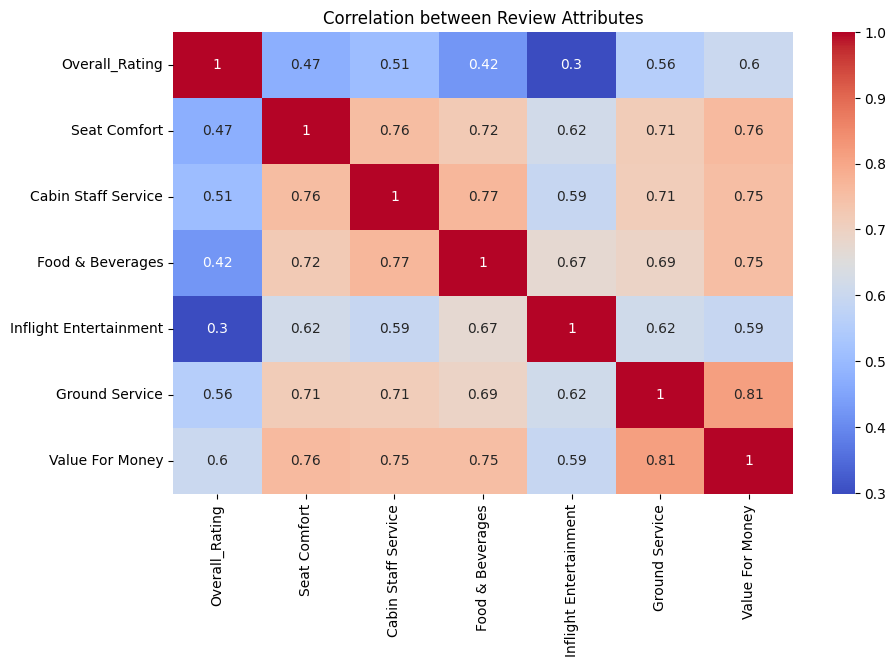

In [ ]:
# Correlation between different review attributes
correlation = df_clean[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Attributes')
plt.show()

**Key Insights:**

- Seat Comfort and Cabin Staff Service: There is a strong positive correlation of 0.76, suggesting that passengers who rate the seat comfort highly also tend to rate the cabin staff service positively. This indicates a possible association between the comfort of the seating and the quality of service provided by the cabin staff.

- Food & Beverages and Cabin Staff Service: Similarly, there is a strong correlation of 0.77 between how passengers rate food & beverages and cabin staff service. This could imply that the overall satisfaction with onboard services tends to be consistent across different service aspects.

- Inflight Entertainment and Ground Service: The correlation of 0.62 shows a moderately strong relationship, suggesting that better experiences with inflight entertainment might be linked with more positive perceptions of ground services.

- Value for Money and Ground Service: The highest correlation observed is 0.81 between the perceived value for money and ground service quality. This strong relationship indicates that the perceived value can heavily influence or be influenced by the quality of ground services provided.

- Overall Rating: This attribute shows moderate to strong correlations with all other aspects, particularly strong with Cabin Staff Service (0.51) and Ground Service (0.56). This suggests that these elements might be significant contributors to the overall satisfaction of passengers.



*Correlation Matrix of Review Attributes for Economy Class*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


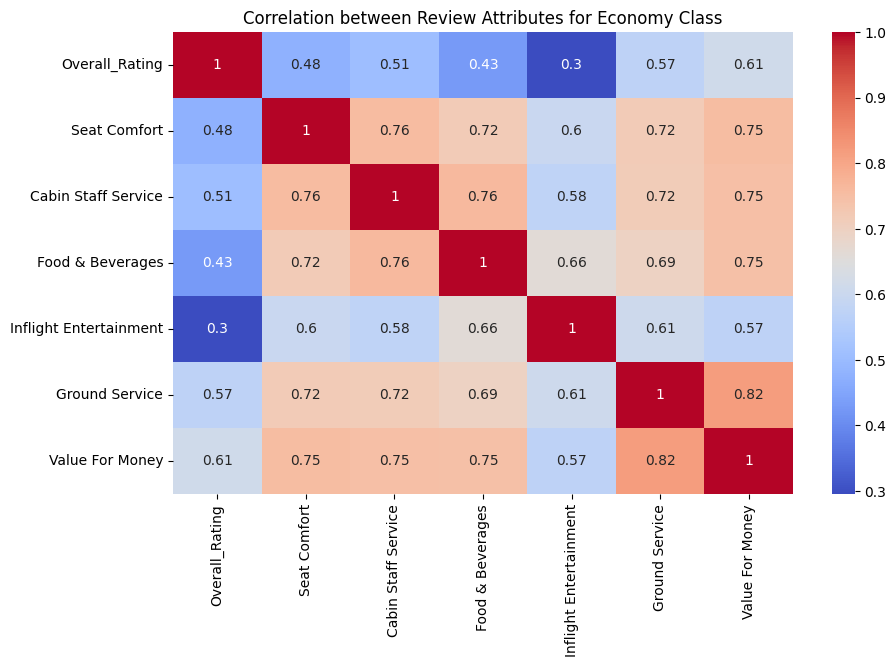

In [ ]:
# Correlation between different review attributes for Economy Class
correlation_economy = df_clean[df_clean['Seat Type'] == 'Economy Class'][['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_economy, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Attributes for Economy Class')
plt.show()

"Overall Rating" is most influenced by "Value For Money" (0.61) and "Ground Service" (0.57).
High correlation between "Value For Money" and "Ground Service" (0.82), suggesting that a good ground service improves value perception.

*Correlation Matrix of Review Attributes for Premium Economy Class*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


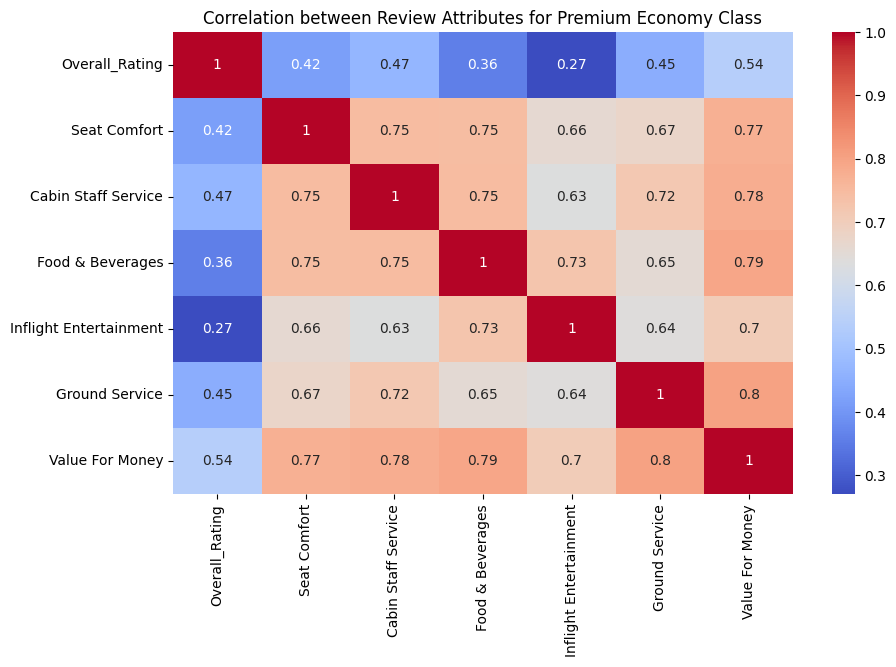

In [ ]:
# Correlation between different review attributes for Premium Economy Class
correlation_premium_economy = df_clean[df_clean['Seat Type'] == 'Premium Economy'][['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_premium_economy, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Attributes for Premium Economy Class')
plt.show()

"Overall Rating" is most influenced by "Value For Money" (0.54) and "Cabin Staff Service" (0.47).
Additionally, there is a notable correlation between "Value For Money" and "Ground Service" (0.8), highlighting the importance of ground service to perceived value.

*Correlation Matrix of Review Attributes for Business Class*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


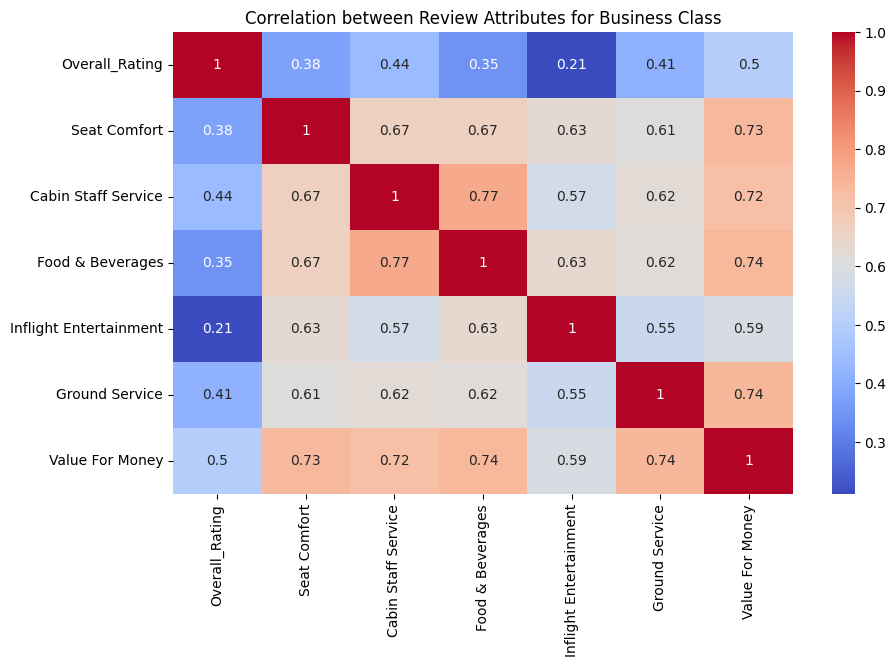

In [ ]:
# Correlation between different review attributes for Business Class
correlation_business = df_clean[df_clean['Seat Type'] == 'Business Class'][['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_business, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Attributes for Business Class')
plt.show()

"Overall Ratin"g most influenced by "Value For Money" (0.5) and "Cabin Staff Service" (0.44).
Also, strong connections can be seen between "Food & Beverages" and "Cabin Staff Service" (0.77), showing good service tends to include good food.

*Correlation Matrix of Review Attributes for First Class*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


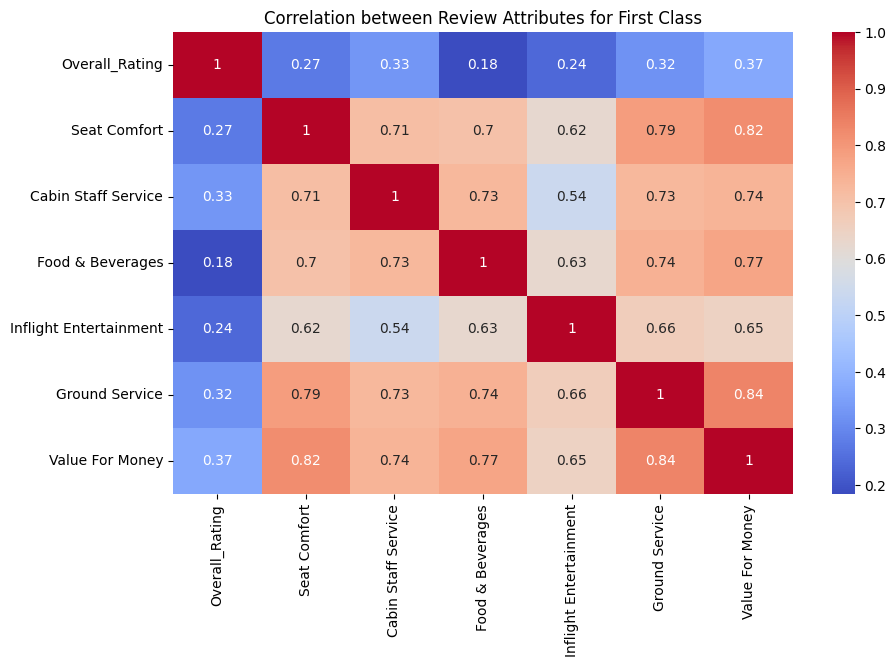

In [ ]:
# Correlation between different review attributes for First Class
correlation_first = df_clean[df_clean['Seat Type'] == 'First Class'][['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_first, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Attributes for First Class')
plt.show()

"Overall Rating" is most influenced by "Value For Money" (0.37) and "Cabin Staff Service" (0.33).
There are high correlations between "Seat Comfort" and "Ground Service" (0.79), and "Seat Comfort" and "Value For Money" (0.82), indicating these aspects often affect each other.

Comparing Classes:

In all classes, "Value For Money" has the highest influence on "Overall Ratings", with Premium Economy and Economy showing the strongest correlations. First and Business Classes also see a significant impact from "Cabin Staff Service," while inter-correlations reveal that aspects like "Seat Comfort" and "Ground Service" are closely linked, especially in First Class. Overall, good service aspects tend to enhance the perceived value, especially in Economy and Premium Economy classes.

####*Average Ratings and Service Quality*

*Average Ratings for Seat Comfort, Cabin Staff Service, and Food & Beverages*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


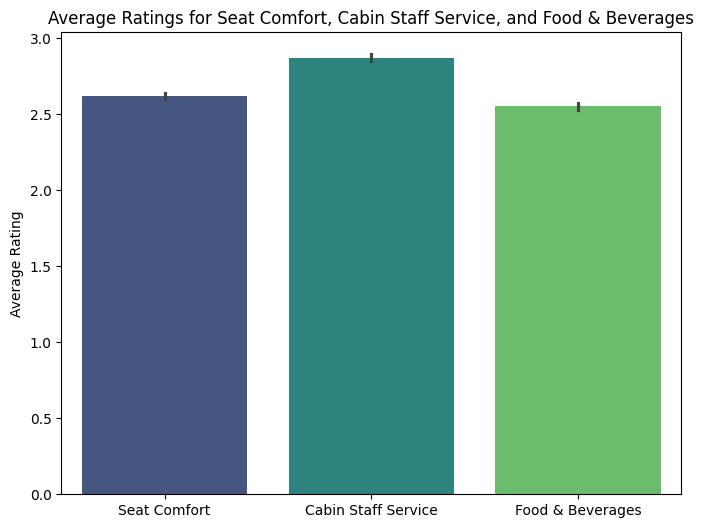

In [ ]:
palette = sns.color_palette("husl", 5)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_clean[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages']],  palette="viridis")
plt.title('Average Ratings for Seat Comfort, Cabin Staff Service, and Food & Beverages')
plt.ylabel('Average Rating')
plt.show()

The bar chart presents average ratings for three aspects of airline service, namely: Seat Comfort, Cabin Staff Service, and Food & Beverages. All three variables show average ratings between 2.5 and 3.0, with Seat Comfort scoring slightly lower than the other two. Cabin Staff Service receives the highest average rating, indicating that customers are generally most satisfied with this aspect out of the three. The error bars suggest a small variation in the responses, indicating consistency in the ratings across respondents.

*Average Ratings for Different Service Aspects*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-8d9e2097de4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service Aspect', y='Rating', data=melted_data, palette="viridis")


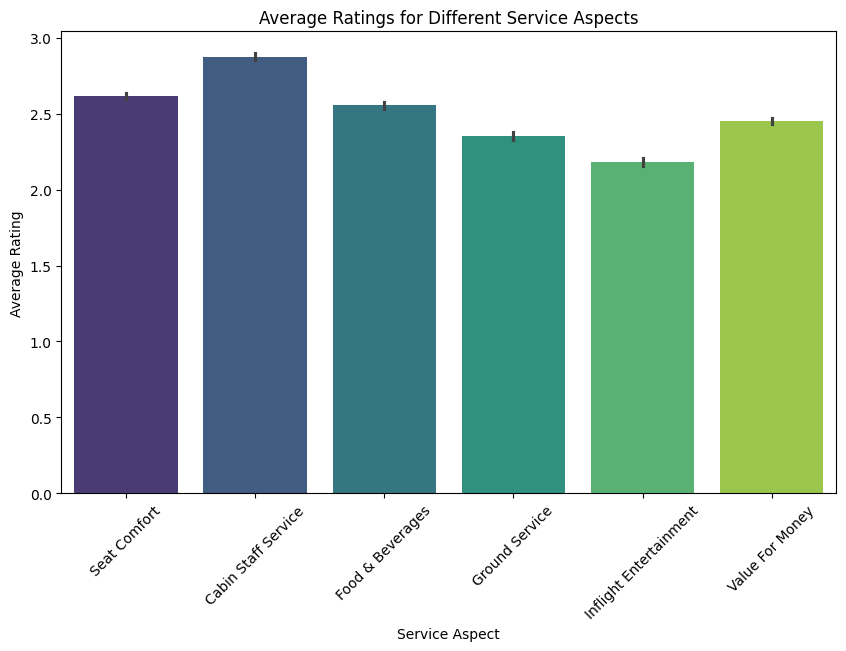

In [ ]:
# Extract relevant columns
aspect_ratings = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Value For Money']]

# Melt the DataFrame for easier plotting
melted_data = aspect_ratings.melt(var_name='Service Aspect', value_name='Rating')

plt.figure(figsize=(10, 6))
sns.barplot(x='Service Aspect', y='Rating', data=melted_data, palette="viridis")
plt.title('Average Ratings for Different Service Aspects')
plt.xlabel('Service Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Cabin Staff Service has the highest average rating, while Inflight Entertainment and Ground Service have the lowest average ratings.

*Overall Rating and Perceived Value for Money*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


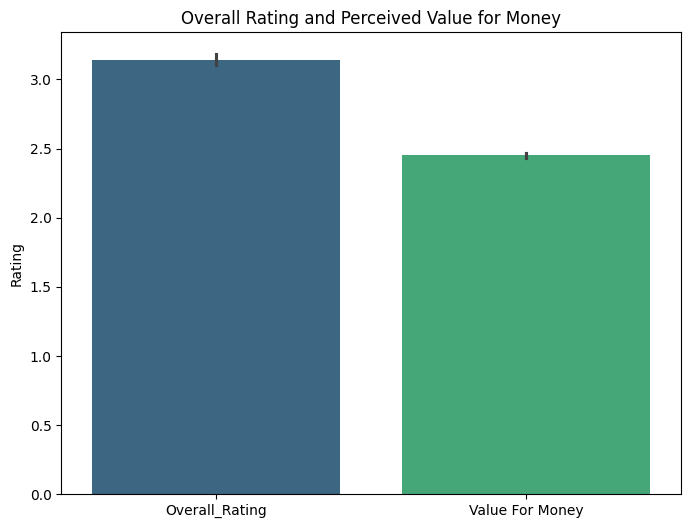

In [ ]:
# Relationship between Overall Rating and Value for Money
plt.figure(figsize=(8, 6))
sns.barplot(data=df_clean[['Overall_Rating', 'Value For Money']], palette="viridis")
plt.title('Overall Rating and Perceived Value for Money')
plt.ylabel('Rating')
plt.show()

Overall Rating is higher than Value for Money, indicating that while the general experience is rated decently, the perceived value for the money spent is slightly lower.

*Average Rating per Class*

Average rating per class:
 Seat Type
Business Class     4.324988
First Class        3.848649
Economy Class      3.004668
Premium Economy    2.990712
Name: Overall_Rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-fab6dab0643b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_class.index, y=average_rating_class.values, palette="viridis")


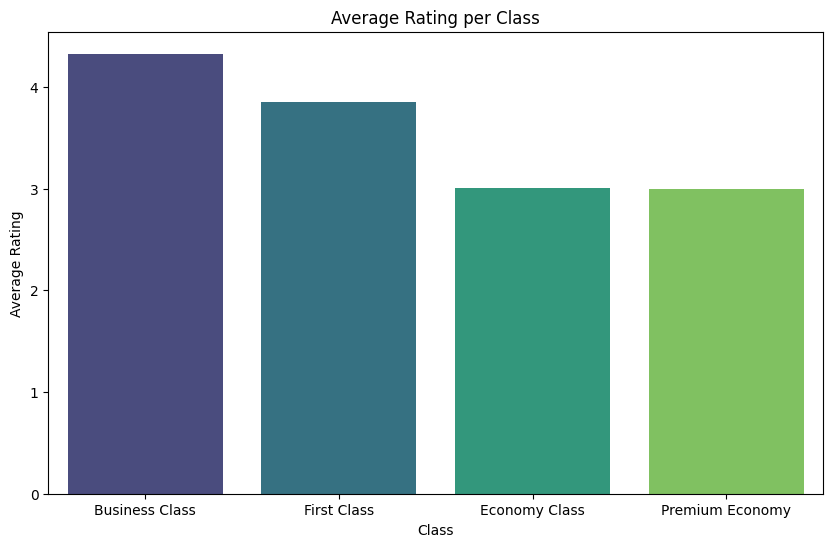

In [ ]:
# Average rating per class
average_rating_class = df_clean.groupby('Seat Type')['Overall_Rating'].mean()
average_rating_class = average_rating_class.sort_values(ascending=False)
print("Average rating per class:\n", average_rating_class)

# Visualize average rating per class with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_class.index, y=average_rating_class.values, palette="viridis")
plt.title('Average Rating per Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.show()

Business Class and First Class have the highest average ratings, while Economy Class and Premium Economy have lower average ratings.

*Impact of Overall Rating on Service Quality*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


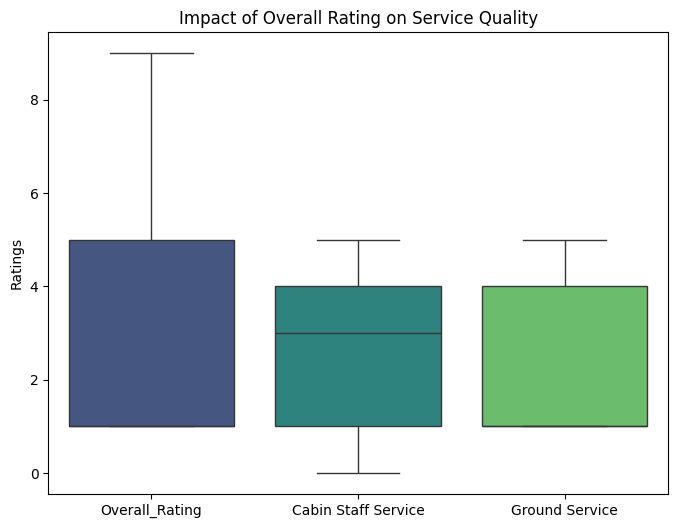

In [ ]:
# Box Plot for Overall Rating and its impact on Service Quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean[['Overall_Rating', 'Cabin Staff Service', 'Ground Service']],  palette="viridis")
plt.title('Impact of Overall Rating on Service Quality')
plt.ylabel('Ratings')
plt.show()

Overall Rating shows the highest variation in ratings. Cabin Staff Service and Ground Service have similar medians and IQRs but lower overall scores compared to the Overall Rating.

*Overall Ratings by Traveller Type*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-c5a5a68d7542>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type Of Traveller', y='Overall_Rating', palette="viridis", data=df_clean)


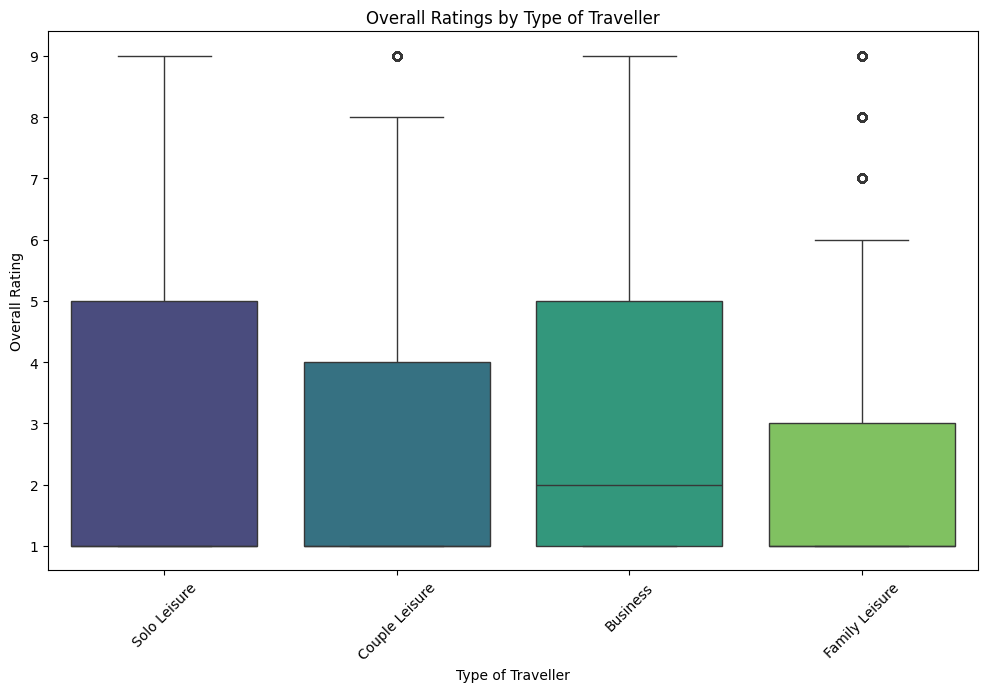

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Type Of Traveller', y='Overall_Rating', palette="viridis", data=df_clean)
plt.title('Overall Ratings by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.show()

Solo Leisure travelers have the highest median overall rating, while Family Leisure travelers have the lowest, with notable variability across all types.

#### *Distribution Analysis*

*Distribution of Ratings for Inflight Entertainment and Ground Service*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


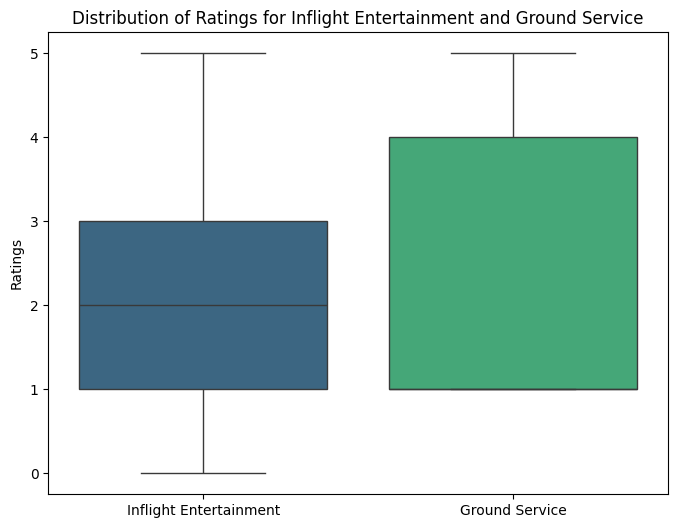

In [ ]:
# Box Plot for Inflight Entertainment vs Ground Service
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Inflight Entertainment', 'Ground Service']], palette="viridis")
plt.title('Distribution of Ratings for Inflight Entertainment and Ground Service')
plt.ylabel('Ratings')
plt.show()

The graph indicates that ground service ratings are generally higher and more dispersed, while inflight entertainment ratings are lower and more concentrated around the median value.









*Distribution of Overall Ratings*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-cadf38bd97ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Overall_Rating'] = df_clean['Overall_Rating'].astype(int)
<ipython-input-32-cadf38bd97ba>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall_Rating

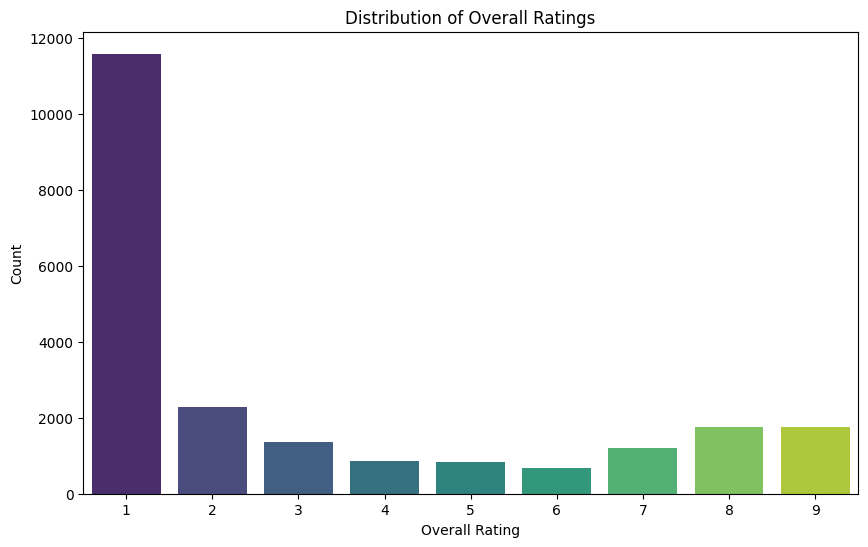

In [ ]:
# Ensure 'Overall_Rating' is numeric and drop rows with missing 'Overall_Rating'
df_clean['Overall_Rating'] = pd.to_numeric(df_clean['Overall_Rating'], errors='coerce')
df_clean = df_clean.dropna(subset=['Overall_Rating'])

# Convert 'Overall_Rating' to integer
df_clean['Overall_Rating'] = df_clean['Overall_Rating'].astype(int)

# Plot the distribution of 'Overall_Rating' after cleaning
plt.figure(figsize=(10, 6))
sns.countplot(x='Overall_Rating', data=df_clean, palette="viridis", order=sorted(df_clean['Overall_Rating'].unique()))
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

The majority of overall ratings are very low, with a significant spike at a rating of 1.

*Distribution of Word Counts per Review*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-53e293331ef0>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_clean['Word Count'], bins=30, kde=True,  palette="viridis")


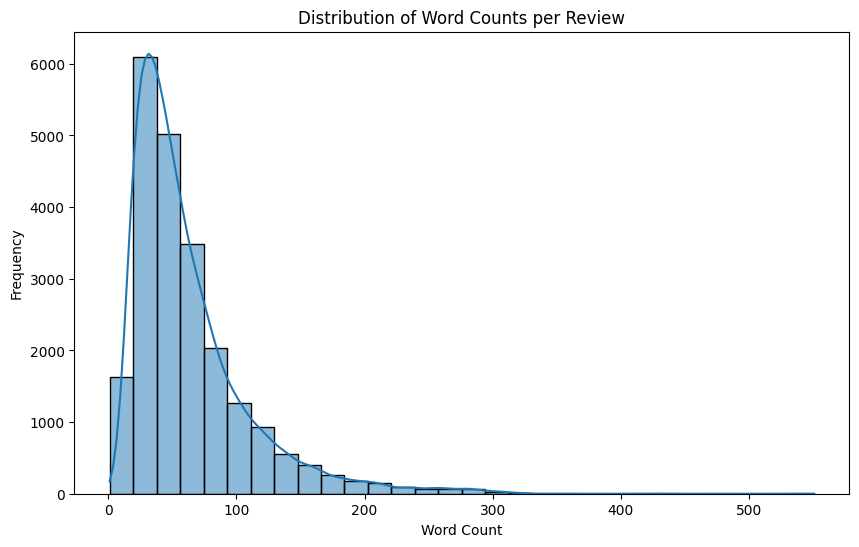

In [ ]:
# Ensure that all reviews are strings
df_clean['Cleaned Review'] = df_clean['Cleaned Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Calculate word count for each review
df_clean['Word Count'] = df_clean['Cleaned Review'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Word Count'], bins=30, kde=True,  palette="viridis")
plt.title('Distribution of Word Counts per Review')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most cleaned reviews are short, with a peak around 20-30 words, and the frequency of reviews decreases as word count increases. The distribution is right-skewed, indicating a few very long reviews, but the majority are concise.

*Count Analysis*

*Review Count by Traveller Type*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-679c9b357aef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type Of Traveller', data=df_clean, palette="viridis")


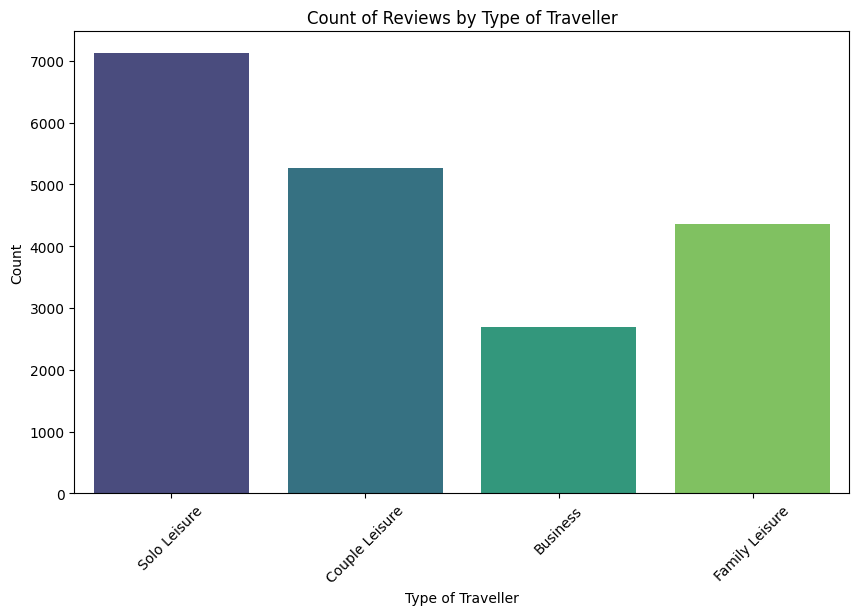

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type Of Traveller', data=df_clean, palette="viridis")
plt.title('Count of Reviews by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Solo Leisure travelers contribute the most reviews. In contrast, business travelers provide the fewest reviews. Couple Leisure and Family Leisure are in between, with Couple Leisure being slightly higher.

*Top 10 Most Reviewed Airlines*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-70b47fc6b3c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Airline Name', data=df_clean, palette="viridis", order=df_clean['Airline Name'].value_counts().head(10).index)


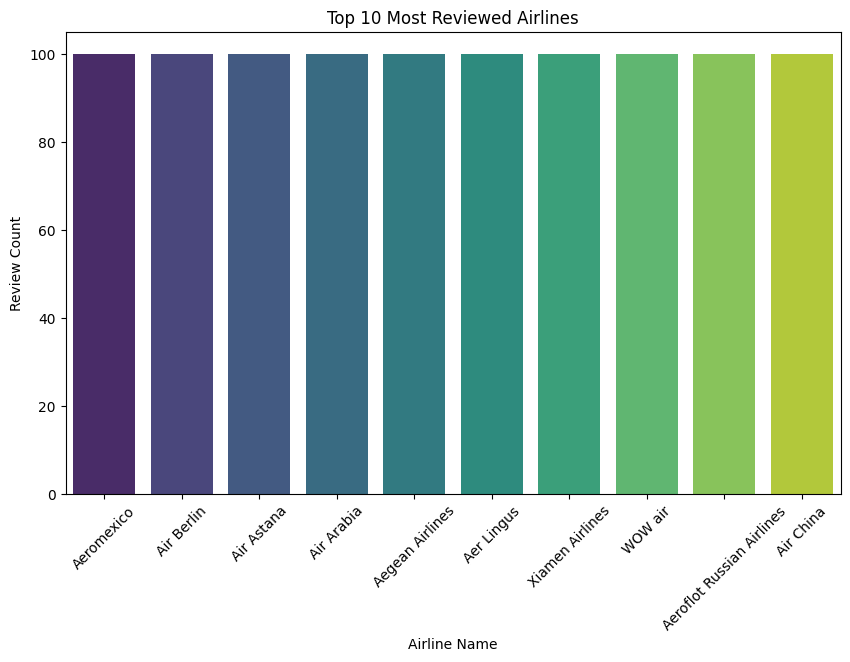

In [ ]:
# Investigate the most reviewed airlines and routes
plt.figure(figsize=(10, 6))
sns.countplot(x='Airline Name', data=df_clean, palette="viridis", order=df_clean['Airline Name'].value_counts().head(10).index)
plt.title('Top 10 Most Reviewed Airlines')
plt.xticks(rotation=45)
plt.ylabel('Review Count')
plt.show()

The top 10 airlines all have an equal number of reviews, indicating consistent interest or feedback for these airlines.

*Top 10 Most Reviewed Routes*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-45a066d24fe2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Route', data=df_clean, palette="viridis", order=df_clean['Route'].value_counts().head(10).index)


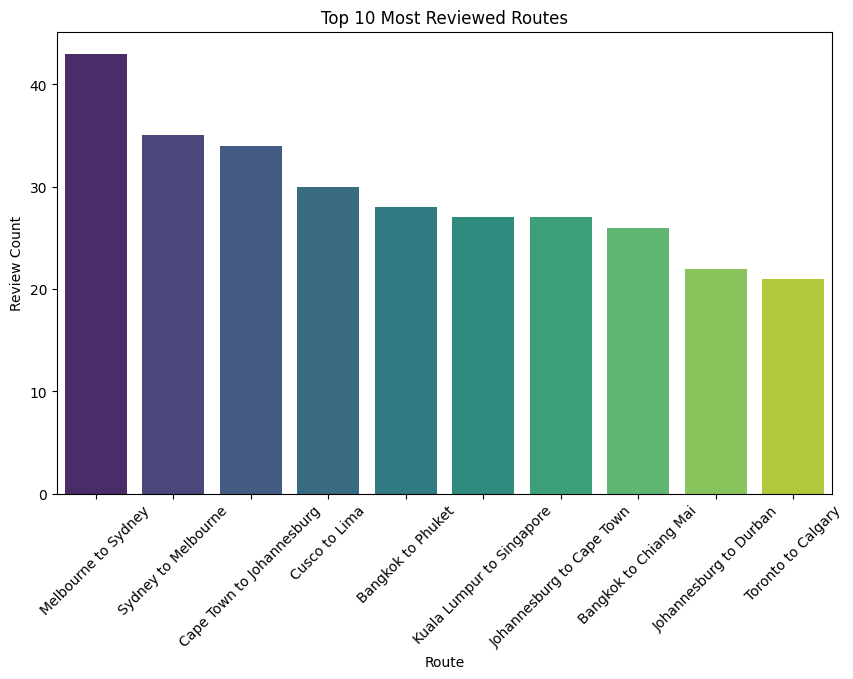

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Route', data=df_clean, palette="viridis", order=df_clean['Route'].value_counts().head(10).index)
plt.title('Top 10 Most Reviewed Routes')
plt.xticks(rotation=45)
plt.ylabel('Review Count')
plt.show()

The most reviewed route is Melbourne to Sydney, followed by Sydney to Melbourne, showing high traffic and engagement for these routes.

#### *Word Analysis*

*Top 10 Most Common Words*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-d6663f8b9164>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette="viridis")


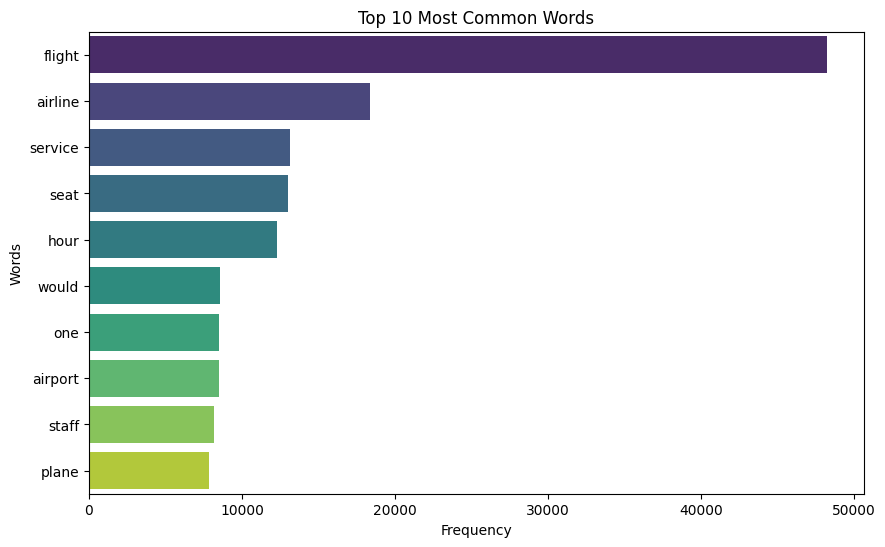

In [ ]:
# Ensure that all reviews are strings
df_clean['Cleaned Review'] = df_clean['Cleaned Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Split words and count frequency
all_words = ' '.join(df_clean['Cleaned Review']).lower().split()
word_counts = Counter(all_words)

# Convert to DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(10), columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette="viridis")
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

The most frequent words in the reviews are "flight," "airline," and "service," indicating common topics of discussion.

####*Recommendations Analysis*

*Recommendations Count*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[ True False]


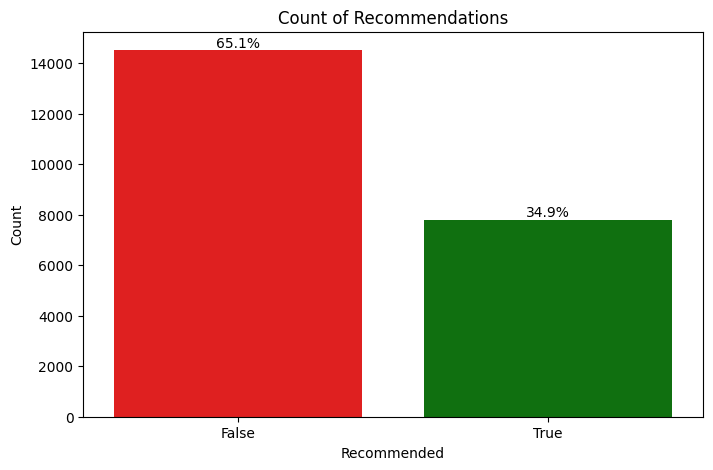

In [ ]:
# Determine the unique values
unique_values = df_clean['Recommended'].unique()
print(unique_values)

# Define the color palette based on the unique values
palette = {'Yes': 'green', 'No': 'red'} if 'Yes' in unique_values else {True: 'green', False: 'red'}

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Recommended', data=df_clean, hue='Recommended', palette=palette, dodge=False)

# Calculate percentages
total = len(df_clean)
for p in ax.patches:
    count = p.get_height()
    if count > 0:  # Only annotate if count is greater than 0
        percentage = f'{count / total * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Count of Recommendations')
plt.xlabel('Recommended')
plt.ylabel('Count')

# Remove the extra legend, because it is not needed
plt.legend([],[], frameon=False)

plt.show()

The graph reveals a significant disparity between the number of customers who recommended and those who did not. This imbalance suggests that most customers are dissatisfied, which is a crucial aspect to address in further analysis. To address this data imbalance during analysis, SMOTE (Synthetic Minority Over-sampling Technique) will be used later on. SMOTE creates synthetic samples for the minority class (in this case, those who recommended), helping to balance the dataset for more accurate and unbiased analysis.

*Proportion of Recommendations per Traveller Type*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


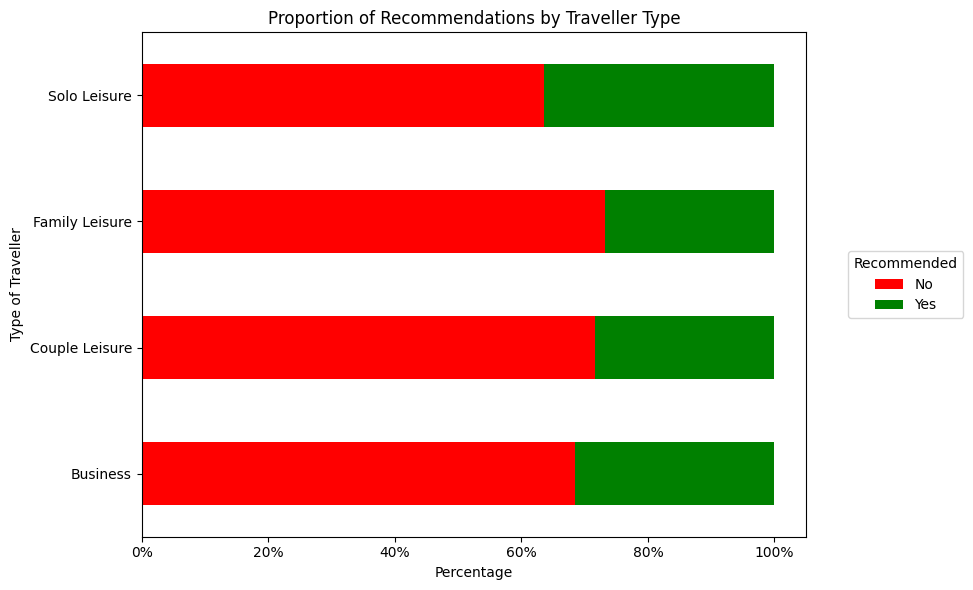

In [ ]:
# Group data and handle missing values by not filling them with zero
rec_data = df_clean.groupby(['Type Of Traveller', 'Recommended']).size().unstack()

# Normalize the data row-wise, taking care of NaN values
rec_percent = rec_data.div(rec_data.sum(axis=1), axis=0) * 100

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
rec_percent.plot(kind='barh', stacked=True, color=['red', 'green'], ax=ax)
plt.title('Proportion of Recommendations by Traveller Type')
plt.xlabel('Percentage')
plt.ylabel('Type of Traveller')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Adjust legend to be centered next to the plot
ax.legend(title='Recommended', labels=['No', 'Yes'], bbox_to_anchor=(1.15, 0.5), loc='center')

plt.tight_layout()
plt.show()

Solo Leisure travelers tend to recommend more compared to other categories.
In contrast, business travelers are the least likely to recommend.
Family Leisure and Couple Leisure have a more balanced distribution but lean towards no recommendations.

####*Time Series Analysis*

*Reviews Over Time*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-8e9b24b5d61e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Review Date'].dt.year.astype(int)


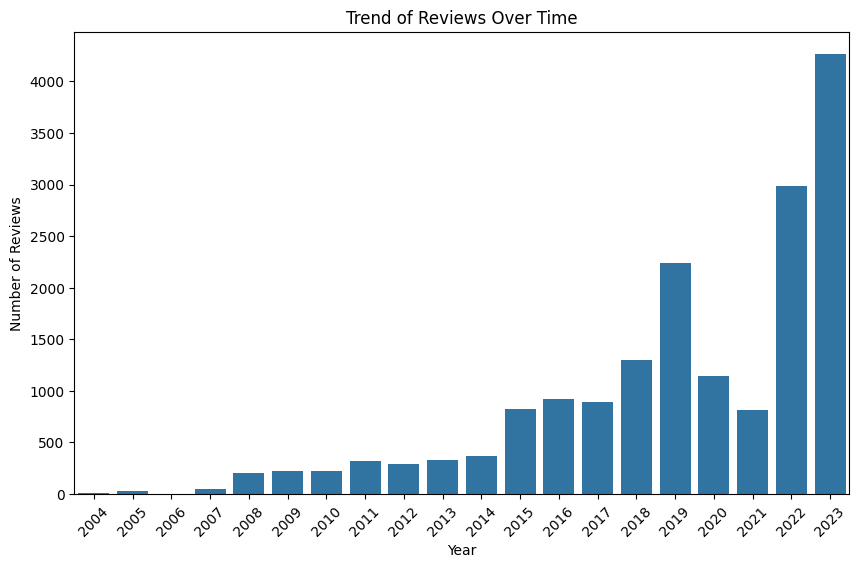

In [ ]:
# Drop rows with missing 'Review Date' values
df_clean = df_clean.dropna(subset=['Review Date'])

# Create a new column for year to aggregate by year
df_clean['Year'] = df_clean['Review Date'].dt.year.astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df_clean)
plt.title('Trend of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

The number of reviews has significantly increased over time, peaking in recent years, indicating growing engagement. Also, there is a peak in 2019 which could be related to high travel activity before the pandemic, as people were traveling extensively before restrictions were imposed.

## Lexicon-based Sentiment Analysis

#### *TextBlob Sentiment Analysis*

In [ ]:
"""

# Function to get sentiment scores
def get_sentiment(text):
    # Ensure text is a string
    if isinstance(text, list):
        text = ' '.join(text)  # Join list elements into a single string
    elif not isinstance(text, str):
        text = str(text)  # Convert other non-string types to string if necessary

    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns the polarity score

# Applying the function to the entire 'Cleaned Review' column
df['Polarity Score'] = df['Cleaned Review'].apply(get_sentiment)

# Computing subjectivity score
df['Subjectivity Score'] = df['Cleaned Review'].apply(lambda text: TextBlob(' '.join(text) if isinstance(text, list) else str(text)).sentiment.subjectivity)

print(df[['Cleaned Review', 'Polarity Score', 'Subjectivity Score']].head())

"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\n# Function to get sentiment scores\ndef get_sentiment(text):\n    # Ensure text is a string\n    if isinstance(text, list):\n        text = ' '.join(text)  # Join list elements into a single string\n    elif not isinstance(text, str):\n        text = str(text)  # Convert other non-string types to string if necessary\n\n    blob = TextBlob(text)\n    return blob.sentiment.polarity  # Returns the polarity score\n\n# Applying the function to the entire 'Cleaned Review' column\ndf['Polarity Score'] = df['Cleaned Review'].apply(get_sentiment)\n\n# Computing subjectivity score\ndf['Subjectivity Score'] = df['Cleaned Review'].apply(lambda text: TextBlob(' '.join(text) if isinstance(text, list) else str(text)).sentiment.subjectivity)\n\nprint(df[['Cleaned Review', 'Polarity Score', 'Subjectivity Score']].head())\n\n"

Score Explanation:
- Polarity Score: Provides a numerical indication of the overall sentiment of the review.
- Subjectivity Score: Provides a measure of how subjective or opinionated the review text is.

Model Characteristics:

- Mechanism: Utilizes a pre-trained model that calculates sentiment based on the polarity and subjectivity of the text. Polarity measures how positive or negative the content is, while subjectivity quantifies the amount of personal opinion and factual information.

- Pros:
Easy to use with straightforward implementation.
Provides both polarity and subjectivity, offering a nuanced view of sentiment.
Good for quick analyses and prototyping with decent accuracy for general purposes.

- Cons:
May not capture complex sentiments or context-dependent expressions effectively.
Less customizable compared to more advanced NLP models.

#### *AFINN Sentiment Analysis*

In [ ]:
"""

afinn = Afinn()

def calculate_afinn_score(text):
    # Ensure input is a string
    if isinstance(text, list):
        text = ' '.join(text)  # Convert list of words to a single string
    elif not isinstance(text, str):
        text = str(text)  # Convert non-string data types to string if needed

    # Calculate the Afinn score for the properly formatted string
    return afinn.score(text)

df['Afinn Score'] = df['Cleaned Review'].apply(calculate_afinn_score)

# Display the first few entries to verify scores
print(df[['Cleaned Review', 'Afinn Score']].head())

"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\nafinn = Afinn()\n\ndef calculate_afinn_score(text):\n    # Ensure input is a string\n    if isinstance(text, list):\n        text = ' '.join(text)  # Convert list of words to a single string\n    elif not isinstance(text, str):\n        text = str(text)  # Convert non-string data types to string if needed\n\n    # Calculate the Afinn score for the properly formatted string\n    return afinn.score(text)\n\ndf['Afinn Score'] = df['Cleaned Review'].apply(calculate_afinn_score)\n\n# Display the first few entries to verify scores\nprint(df[['Cleaned Review', 'Afinn Score']].head())\n\n"

Model Characteristics:

- Mechanism: A lexicon-based tool where words are scored with integers ranging from -5 to 5. Scores are summed to give the final sentiment score of the text.

- Pros:
Simple and interpretable scoring system.
Effective for capturing straightforward positive and negative sentiments.
No need for heavy computational resources.

- Cons:
Relies solely on a static word list; may miss nuanced expressions or slang.
Does not consider word context or sentence structure, which can lead to inaccuracies.

#### *SentiWordNet Sentiment Analysis*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Unnamed: 0   Airline Name  Overall_Rating  \
0           0    AB Aviation               9   
1           1    AB Aviation               1   
2           2    AB Aviation               1   
3           3  Adria Airways               1   
4           4  Adria Airways               1   

                            Review_Title Review Date  Verified  \
0                "pretty decent airline"  2019-11-11      True   
1                   "Not a good airline"  2019-06-25      True   
2         "flight was fortunately short"  2019-06-25      True   
3    "I will never fly again with Adria"  2019-09-28     False   
4  "it ruined our last days of holidays"  2019-09-24      True   

                                              Review Type Of Traveller  \
0    Moroni to Moheli. Turned out to be a pretty ...      Solo Leisure   
1   Moroni to Anjouan. It is a very small airline...      Solo Leisure   
2    Anjouan to Dzaoudzi. A very small airline an...      Solo Leisure   
3    Please do a f

<ipython-input-43-0356ef1993fb>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_ratings.index, y=sentiment_ratings.values, palette="dark")


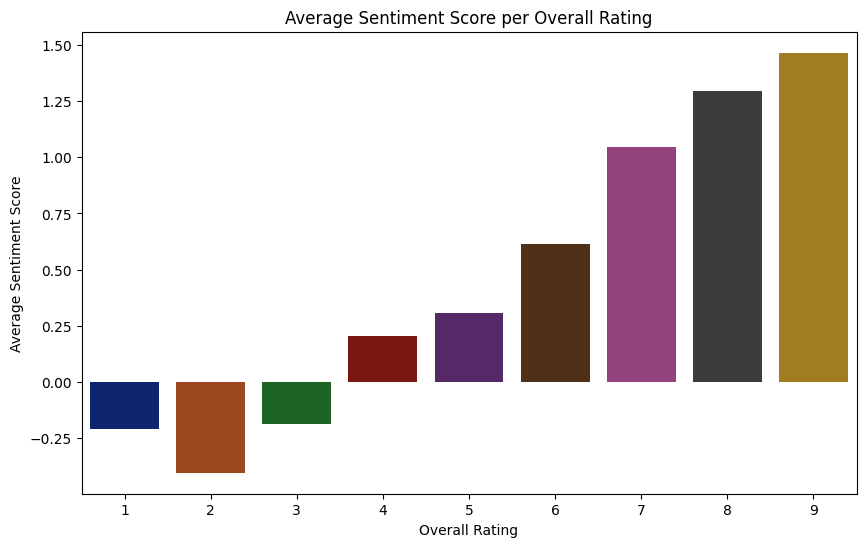

In [ ]:
def get_wordnet_pos(treebank_tag):
    """Converts part-of-speech tags from the Penn Treebank tag to a WordNet tag."""
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

def sentiment_analysis(text):
    """
    Analyzes the sentiment of the provided text using the SentiWordNet lexicon.
    This function performs tokenization, POS tagging, stopword and location name removal, lemmatization,
    and then calculates the sentiment score. Thus, it performs the steps of the
    data preprocessing, but in this way ensures that POS tagging can be still applied.
    """
    # Ensure input is a string
    if not isinstance(text, str):
        text = ' '.join(text) if isinstance(text, list) else str(text)

    # Tokenize the text and perform POS tagging
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    # Load stopwords list
    stop_words = set(stopwords.words('english'))

    # Initialize lists for filtered and lemmatized tokens
    filtered_tokens = []

    for word, tag in pos_tags:
        # Convert POS tag to a WordNet-applicable format
        wn_tag = get_wordnet_pos(tag)

        # Skip stopwords and location names
        if word.lower() in stop_words or word.lower() in location_names:
            continue

        # Lemmatize the token
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        filtered_tokens.append((lemma, wn_tag))

    pos_score = 0
    neg_score = 0

    # Calculate sentiment scores using SentiWordNet
    for lemma, wn_tag in filtered_tokens:
        synsets = list(swn.senti_synsets(lemma, wn_tag))
        if not synsets:
            continue

        # Use the first synset for sentiment calculation
        synset = synsets[0]
        pos_score += synset.pos_score()
        neg_score += synset.neg_score()

    # The net sentiment score
    score = pos_score - neg_score
    return score

# Apply sentiment analysis to the 'Review' column
df_sentiment = df_clean.copy()
df_sentiment['SWN_Sentiment'] = df_clean['Review'].apply(sentiment_analysis)
df_sentiment.to_csv('/content/Airline_Reviews_SWN_Sentiment.csv', index=False)
print(df_sentiment.head())

# Group and visualize sentiment scores
sentiment_ratings = df_sentiment.groupby('Overall_Rating')['SWN_Sentiment'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_ratings.index, y=sentiment_ratings.values, palette="dark")
plt.title('Average Sentiment Score per Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Sentiment Score')
plt.show()


The chart shows the average sentiment scores for reviews across different ratings. Sentiment scores increase with higher ratings, indicating a positive correlation between review sentiment and rating.

Model Characteristics:

- Mechanism: An extension of WordNet which assigns to each synset of WordNet three sentiment scores: positivity, negativity, and objectivity.

- Pros:
Provides detailed sentiment scores based on word senses, allowing for more precise sentiment analysis considering different meanings of a word.
Integrates well with other NLP tasks that require deep linguistic analysis.

- Cons:
Requires understanding of NLP concepts like POS tagging and lemmatization to use effectively.
More complex to implement and computationally heavier than simpler methods.

Differences between Sentiment Analyses:

- Granularity: TextBlob and SentiWordNet provide scores that can capture a range of sentiments (including subjectivity in the case of TextBlob), whereas AFINN gives a single cumulative score.

- Context Sensitivity: SentiWordNet takes into account the context more effectively than AFINN due to its use of word senses. TextBlob falls somewhere in between, offering reasonable context sensitivity without the complexity of SentiWordNet.

- Usage: TextBlob and AFINN are generally easier for beginners to implement and use compared to SentiWordNet, which requires more advanced setup and understanding of linguistics.

We move forward with SentiWordNet due to the described reasons.

## Deep Learner-based Sentiment Analysis

#### *BERT Sentiment Analysis*

In [ ]:
# Instantiate Model

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_bert = df_sentiment.copy()
df_bert['BERT_Sentiment'] = df_sentiment['Cleaned Review'].apply(lambda x: sentiment_score(x[:512]))

df_bert.to_csv('/content/Airline_Reviews_Sentiment_BERT.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_bert.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Route,...,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Cleaned Review,Word Count,Year,SWN_Sentiment,BERT_Sentiment
0,0,AB Aviation,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,Moroni to Moheli,...,4.0,NaN,NaN,3.0,True,turned pretty decent airline online booking wo...,29,2019,3.250,3
1,1,AB Aviation,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,Moroni to Anjouan,...,1.0,NaN,NaN,2.0,False,small airline ticket advised turn 0800hrs conf...,46,2019,-2.125,1
2,2,AB Aviation,1,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,...,1.0,NaN,NaN,2.0,False,small airline airline based checkin disorganis...,31,2019,0.125,2
3,3,Adria Airways,1,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,Solo Leisure,Economy Class,Frankfurt to Pristina,...,1.0,NaN,NaN,1.0,False,please favor fly route july 2019 lost luggage ...,61,2019,-4.375,1
4,4,Adria Airways,1,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,...,1.0,1.0,1.0,1.0,False,book flight airline friend returned september ...,50,2019,-1.125,1


In [ ]:
missing_values = df_bert.isnull().sum()
print("Missing values in dataset:\n", missing_values)

Missing values in dataset:
 Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Type Of Traveller          2243
Seat Type                   455
Route                      2320
Date Flown                 2257
Seat Comfort               2729
Cabin Staff Service        2813
Food & Beverages           6270
Ground Service             3078
Inflight Entertainment     9151
Wifi & Connectivity       12827
Value For Money             430
Recommended                   0
Cleaned Review                0
Word Count                    0
Year                          0
SWN_Sentiment                 0
BERT_Sentiment                0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-2fdc5293ead9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_ratings.index, y=sentiment_ratings.values, palette="dark")


Average sentiment score per overall rating:
 Overall_Rating
9    3.494357
8    3.222707
7    2.781316
6    2.246183
5    2.064815
4    1.824588
1    1.575781
3    1.337626
2    1.186682
Name: BERT_Sentiment, dtype: float64


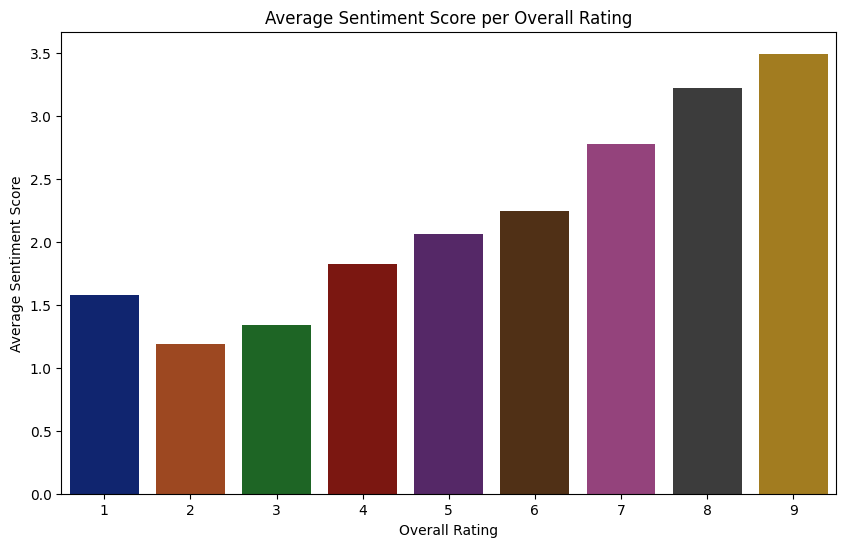

In [ ]:
# Compare sentiment scores with overall ratings to understand alignment
sentiment_ratings = df_bert.groupby('Overall_Rating')['BERT_Sentiment'].mean()
sentiment_ratings = sentiment_ratings.sort_values(ascending=False)
print("Average sentiment score per overall rating:\n", sentiment_ratings)

# visualize sentiment scores with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_ratings.index, y=sentiment_ratings.values, palette="dark")
plt.title('Average Sentiment Score per Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Average Sentiment Score')
plt.show()

# Top Words per Class

In [ ]:
df_bert['Seat Type'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Economy Class', 'Business Class', nan, 'Premium Economy',
       'First Class'], dtype=object)

In [ ]:
# Words to exclude
common_words = {'flight', 'airline', 'class', 'one', 'u', 'would', 'first', 'business', 'good', 'great', 'day', 'airport', 'excellent',
                'air', 'get', 'told', 'fly', 'cabin', 'well', 'plane', 'aircraft', 'agent', 'way', 'even', 'hour', 'never', 'passenger',
                'customer', 'experience', 'best', 'back', 'could', 'got', 'another', 'minute', 'two', 'booked', 'take', 'people', 'made',
                'home', 'paid', 'worst', 'said', 'go', 'bad', 'call', 'premium', 'flying', 'garuda', 'really', 'year', 'didnt', 'ground', 'use'}

# Function to get top terms
def get_top_terms(df, sentiment, class_name, n_terms=10):
    df_sent = df_bert[df_bert['BERT_Sentiment'] == sentiment]
    df_class = df_sent[df_sent['Seat Type'] == class_name]
    text = ' '.join(df_class['Cleaned Review'])
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in common_words and token.isalpha()]
    freq = nltk.FreqDist(filtered_tokens)
    top_terms = freq.most_common(n_terms)
    return top_terms

# Get top terms for positive sentiment and economy class
top_positive_economy = get_top_terms(df_bert, 5, 'Economy Class', 10)
print("Top terms for positive sentiment and economy class:\n", top_positive_economy)

# Get top terms for negative sentiment and economy class
top_negative_economy = get_top_terms(df_bert, 1, 'Economy Class', 10)
print("Top terms for negative sentiment and economy class:\n", top_negative_economy)

# Get top terms for positive sentiment and premium economy class
top_positive_premium_economy = get_top_terms(df_bert, 5, 'Premium Economy', 10)
print("\nTop terms for positive sentiment and premium economy class:\n", top_positive_premium_economy)

# Get top terms for negative sentiment and premium economy class
top_negative_premium_economy = get_top_terms(df_bert, 1, 'Premium Economy', 10)
print("Top terms for negative sentiment and premium economy class:\n", top_negative_premium_economy)

# Get top terms for positive sentiment and business class
top_positive_business = get_top_terms(df_bert, 5, 'Business Class', 10)
print("\nTop terms for positive sentiment and business class:\n", top_positive_business)

# Get top terms for negative sentiment and business class
top_negative_business = get_top_terms(df_bert, 1, 'Business Class', 10)
print("Top terms for negative sentiment and business class:\n", top_negative_business)

# Get top terms for positive sentiment and first class
top_positive_first = get_top_terms(df_bert, 5, 'First Class', 10)
print("\nTop terms for positive sentiment and first class:\n", top_positive_first)

# Get top terms for negative sentiment and first class
top_negative_first = get_top_terms(df_bert, 1, 'First Class', 10)
print("Top terms for negative sentiment and first class:\n", top_negative_first)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top terms for positive sentiment and economy class:
 [('service', 667), ('crew', 470), ('staff', 437), ('seat', 373), ('food', 266), ('clean', 213), ('comfortable', 209), ('new', 181), ('meal', 180), ('helpful', 170)]
Top terms for negative sentiment and economy class:
 [('service', 5687), ('seat', 4709), ('ticket', 3966), ('staff', 3612), ('luggage', 3355), ('check', 2834), ('delayed', 2811), ('refund', 2413), ('pay', 2354), ('boarding', 2304)]

Top terms for positive sentiment and premium economy class:
 [('seat', 47), ('service', 46), ('food', 25), ('crew', 22), ('staff', 19), ('comfortable', 19), ('meal', 18), ('drink', 13), ('entertainment', 12), ('flew', 11)]
Top terms for negative sentiment and premium economy class:
 [('seat', 364), ('service', 242), ('ticket', 127), ('staff', 109), ('luggage', 98), ('food', 93), ('extra', 91), ('refund', 86), ('return', 83), ('crew', 81)]

Top terms for positive sentiment and business class:
 [('service', 217), ('seat', 146), ('food', 133), ('

## Bag of Words

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [ ]:
processed_docs = df_bert['Cleaned Review'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(dictionary.values()))

30286


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i, (k, v) in enumerate(dictionary.iteritems()):
    print(k, v)
    if i > 10:
        break

0 20
1 airline
2 biscuit
3 boarding
4 booking
5 bottle
6 checkin
7 decent
8 didnt
9 expect
10 fine
11 flight


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can see that some of the common words like "airline" do not give insight about topics.

## Gensim Filtering

In [ ]:
print(len(dictionary))

30286


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Filter out tokens that appear in
less than 10 documents (absolute number) or
more than 0.5 documents (fraction of total corpus size, not absolute number).
after the above two steps, keep only the first 100000 most frequent tokens.

In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
print(len(dictionary.iteritems()))

5358


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
common_words = {'flight', 'airline', 'one', 'decent', 'fine', 'u', 'would', 'first', 'good', 'great', 'day', 'excellent', 'air', 'get', 'told', 'fly', 'cabin', 'well', 'plane', 'aircraft', 'even', 'never', 'passenger', 'customer', 'experience', 'best'}

# Get the IDs of the common words in the dictionary
common_word_ids = [dictionary.token2id[word] for word in common_words if word in dictionary.token2id]

# Filter out the common words from the dictionary
dictionary.filter_tokens(bad_ids=common_word_ids)

# Reassign token IDs after filtering
dictionary.compactify()

# Print the number of remaining unique tokens in the dictionary
print(len(dictionary))

5334


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Gensim doc2bow**

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Running LDA using Bag of Words

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [ ]:
lda_model = gensim.models.LdaModel(
    corpus=bow_corpus,
    num_topics=25,
    id2word=dictionary,
    random_state=100,
    iterations=2,
    passes=10,
    alpha=0.01,  # Low document-topic density
    eta='auto'     # Automatically learn the word-topic density
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Inspecting the model

In [ ]:
alpha = lda_model.alpha  # Document-topic distribution parameters
eta = lda_model.eta  # Topic-word distribution parameters (often referred to as beta)

print("Alpha (Document-Topic distribution):", alpha)
print("Eta (Topic-Word distribution, often referred to as Beta):", eta)

Alpha (Document-Topic distribution): [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
Eta (Topic-Word distribution, often referred to as Beta): [0.1828923  0.03608848 0.10175591 ... 0.03342338 0.03342338 0.03342338]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming lda_model is already trained and available
topics = lda_model.print_topics(num_words=10)

# Print each topic with its top 10 most dominant words
for topic_num, topic in topics:
    print(f"Topic #{topic_num + 1}:")  # Adjust topic number for human-readable indexing (1-based)

    # Parsing the topic string to extract words and their probabilities
    topic_words = ", ".join([word for word, prob in [term.split('*') for term in topic.split(' + ')]])

    print(f"Top words: {topic_words}\n")

Topic #13:
Top words: 0.055, 0.030, 0.025, 0.023, 0.022, 0.019, 0.019, 0.018, 0.017, 0.016

Topic #25:
Top words: 0.120, 0.054, 0.044, 0.044, 0.040, 0.037, 0.025, 0.020, 0.019, 0.017

Topic #22:
Top words: 0.052, 0.047, 0.047, 0.028, 0.027, 0.020, 0.018, 0.016, 0.013, 0.011

Topic #12:
Top words: 0.069, 0.057, 0.051, 0.035, 0.026, 0.025, 0.022, 0.019, 0.018, 0.018

Topic #21:
Top words: 0.038, 0.032, 0.018, 0.018, 0.017, 0.015, 0.014, 0.013, 0.013, 0.012

Topic #20:
Top words: 0.063, 0.035, 0.033, 0.030, 0.020, 0.016, 0.016, 0.016, 0.015, 0.015

Topic #11:
Top words: 0.079, 0.067, 0.036, 0.025, 0.021, 0.021, 0.018, 0.017, 0.015, 0.013

Topic #2:
Top words: 0.067, 0.044, 0.032, 0.024, 0.023, 0.018, 0.016, 0.015, 0.014, 0.014

Topic #1:
Top words: 0.054, 0.052, 0.030, 0.026, 0.020, 0.016, 0.016, 0.015, 0.013, 0.012

Topic #7:
Top words: 0.095, 0.055, 0.052, 0.038, 0.022, 0.015, 0.014, 0.014, 0.012, 0.012

Topic #17:
Top words: 0.053, 0.040, 0.038, 0.032, 0.020, 0.020, 0.019, 0.017, 0.017

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Assigning Topics

In [ ]:
dominant_topics = []
keywords = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
    # Get the dominant topic, Percentage Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  # => dominant topic
            wp = lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            dominant_topics.append((i, round(prop_topic,4), topic_num, topic_keywords))
        else:
            break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a DataFrame
df_topic_keywords = pd.DataFrame(dominant_topics, columns=['Document_No', 'Dominant_Topic_Percentage', 'Dominant_Topic', 'Keywords'])

# Merge with original DataFrame
df_topic = df_bert.copy()
df_topic = pd.merge(df_bert, df_topic_keywords, left_index=True, right_on='Document_No')

# Show the DataFrame with the new columns
print(df_topic.head())

   Unnamed: 0   Airline Name  Overall_Rating  \
0           0    AB Aviation               9   
1           1    AB Aviation               1   
2           2    AB Aviation               1   
3           3  Adria Airways               1   
4           4  Adria Airways               1   

                            Review_Title Review Date  Verified  \
0                "pretty decent airline"  2019-11-11      True   
1                   "Not a good airline"  2019-06-25      True   
2         "flight was fortunately short"  2019-06-25      True   
3    "I will never fly again with Adria"  2019-09-28     False   
4  "it ruined our last days of holidays"  2019-09-24      True   

                                              Review Type Of Traveller  \
0    Moroni to Moheli. Turned out to be a pretty ...      Solo Leisure   
1   Moroni to Anjouan. It is a very small airline...      Solo Leisure   
2    Anjouan to Dzaoudzi. A very small airline an...      Solo Leisure   
3    Please do a f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
file_path = '/content/Airline_Final.csv' # Define the file path where you want to save the CSV
df_topic.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index as a separate column

print(f"DataFrame saved to {file_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DataFrame saved to /content/Airline_Final.csv


# Evaluation

### Perplexity

Perplexity measures how well a probability model predicts a sample. A lower perplexity score indicates better generalization performance.

In [ ]:
print('Perplexity: ', lda_model.log_perplexity(bow_corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -8.58082024201018


### Coherence Score

Topic coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These metrics help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



Coherence Score:  0.44359530978592715


In [ ]:
# Calculate the average of the Dominant_Topic_Percentage column
average_dominant_topic_percentage = df_topic['Dominant_Topic_Percentage'].mean()

# Print the average
print("Average Dominant Topic Percentage:", average_dominant_topic_percentage)

Average Dominant Topic Percentage: 0.23927613


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Quality Inspection

In [ ]:
# Display topics with the top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(15, '0.097*"staff" + 0.054*"return" + 0.022*"ground" + 0.013*"qantas" + 0.012*"totally" + 0.012*"clear" + 0.011*"without" + 0.011*"transfer" + 0.010*"issue" + 0.010*"returning"')
(12, '0.055*"delay" + 0.030*"changed" + 0.025*"reason" + 0.023*"ticket" + 0.022*"time" + 0.019*"4" + 0.019*"expensive" + 0.018*"hr" + 0.017*"different" + 0.016*"last"')
(5, '0.039*"board" + 0.035*"free" + 0.029*"price" + 0.023*"ok" + 0.021*"budget" + 0.020*"priority" + 0.018*"etc" + 0.018*"expected" + 0.016*"fare" + 0.014*"must"')
(20, '0.038*"flown" + 0.032*"staff" + 0.018*"transit" + 0.018*"start" + 0.017*"thank" + 0.015*"always" + 0.014*"member" + 0.013*"special" + 0.013*"inside" + 0.012*"like"')
(24, '0.120*"check" + 0.054*"checkin" + 0.044*"counter" + 0.044*"online" + 0.040*"airport" + 0.037*"boarding" + 0.025*"pas" + 0.020*"desk" + 0.019*"staff" + 0.017*"checking"')
(13, '0.149*"hour" + 0.058*"delayed" + 0.040*"minute" + 0.025*"2" + 0.023*"wait" + 0.022*"departure" + 0.020*"delay" + 0.020*"arrived" + 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic Vizualizations

### Intertopic Distance Map

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.102368 -0.231656       1        1  6.269779
6     -0.239063 -0.029768       2        1  5.315634
3     -0.213624 -0.206228       3        1  5.043410
0      0.132112  0.016897       4        1  4.849481
18     0.148619 -0.096135       5        1  4.819500
11     0.114301  0.062639       6        1  4.695360
22    -0.260593  0.007342       7        1  4.571919
17     0.018489 -0.035811       8        1  4.547221
8     -0.069355 -0.090020       9        1  4.450468
7      0.077265 -0.200092      10        1  4.110770
24     0.086094 -0.161382      11        1  3.976362
19     0.191112  0.007042      12        1  3.949694
10     0.161940  0.011476      13        1  3.941605
12     0.052552  0.043879      14        1  3.842508
16     0.177290  0.090006      15        1  3.752034
4     -0.224860 -0.037923      16        1  3.668741
2     -0.030545  0.186183      17        1  3.632749
21    -0.111858  0.159920      18        1  3.353542
14     0.055955  0.071331      19        1  3.277507
15    -0.007943  0.028817      20        1  3.264491
9      0.134574  0.080315      21        1  3.202153
5     -0.117280  0.014466      22        1  3.179259
1      0.047828  0.108489      23        1  3.177888
20    -0.094566  0.133308      24        1  2.913682
23    -0.130810  0.066905      25        1  2.194244, topic_info=         Term          Freq         Total Category  logprob  loglift
473      seat  10112.000000  10112.000000  Default  30.0000  30.0000
91       hour   9545.000000   9545.000000  Default  29.0000  29.0000
65    service  10228.000000  10228.000000  Default  28.0000  28.0000
193      crew   5338.000000   5338.000000  Default  27.0000  27.0000
786     check   4477.000000   4477.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2146     asia    153.690769    222.672803  Topic25  -4.8557   3.4486
1277     term    145.383733    228.306018  Topic25  -4.9113   3.3680
619     price    204.125187   1946.355619  Topic25  -4.5719   1.5644
654      flew    179.941695   1948.287019  Topic25  -4.6980   1.4373
65    service    180.558305  10228.777826  Topic25  -4.6946  -0.2176

[1536 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
179       1  0.689464        1
179       2  0.000651        1
179       3  0.033855        1
179       4  0.014974        1
179       6  0.059897        1
...     ...       ...      ...
225      25  0.000615     year
1599     19  0.988124    youll
4721     18  0.991033  zealand
2534     22  0.990659     zone
3653     25  0.984536        à

[6198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 4, 1, 19, 12, 23, 18, 9, 8, 25, 20, 11, 13, 17, 5, 3, 22, 15, 16, 10, 6, 2, 21, 24])

Circles: Each circle represents a topic. The size of a circle indicates the prevalence of the topic in the corpus.

Positioning: Topics that are closer to each other are more similar. For instance, topics 7 and 8 are close to each other, suggesting similar themes or subjects.

PCA/MDS Axes (PC1, PC2): These are principal components that reduce the topic dimensions into a 2D space for visualization. They don't have intrinsic meaning but help spatially separate topics for better visualization.

Top-30 Most Salient Terms: Each bar represents a term's salience, which is a measure of how much the term tells you about the topic. Salience is defined as the term’s frequency within the selected topic, multiplied by the distinctiveness of the term across multiple topics.

Relevance Metric (λ): The slider above allows to adjust the λ parameter, which balances term frequency and the term’s exclusivity to the topic. At λ = 1, the terms are ranked purely by their frequency within the topic. At λ = 0, the terms are ranked by their exclusivity to the topic.

### Wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


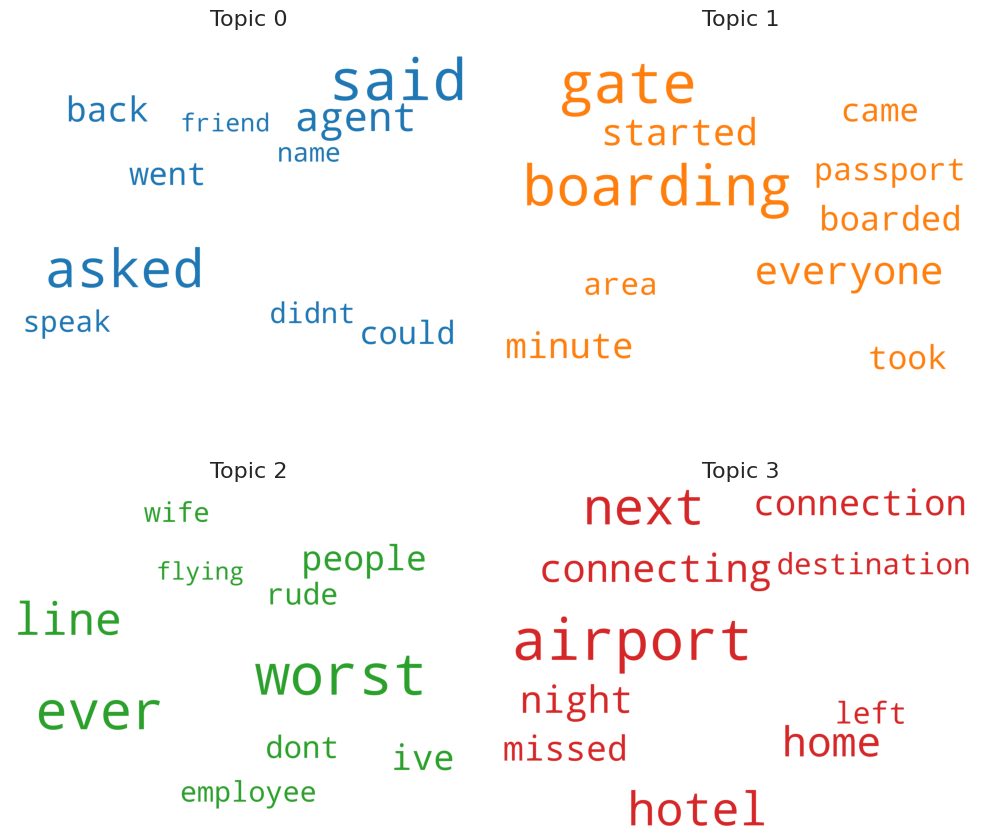

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Colors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # Choose colors from matplotlib's TABLEAU_COLORS

# Stopwords
stop_words = set(stopwords.words('english'))

# Initialize WordCloud
cloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    width=2500,
    height=1800,
    max_words=10,
    colormap='tab10',
    color_func=lambda *args, **kwargs: cols[i],
    prefer_horizontal=1.0
)

# Get topics from LDA model
topics = lda_model.show_topics(formatted=False)

# Create subplot using matplotlib with seaborn's style
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.imshow(cloud)
    ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Analysis and Business Insights

In [75]:
sns.set_style("whitegrid")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Loading

In [76]:
df = pd.read_csv('Airline_Final.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Route,...,Recommended,Cleaned Review,Word Count,Year,SWN_Sentiment,BERT_Sentiment,Document_No,Dominant_Topic_Percentage,Dominant_Topic,Keywords
0,0,AB Aviation,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,Moroni to Moheli,...,True,turned pretty decent airline online booking wo...,29,2019,3.250,3,0,0.2155,24,"check, checkin, counter, online, airport, boar..."
1,1,AB Aviation,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,Moroni to Anjouan,...,False,small airline ticket advised turn 0800hrs conf...,46,2019,-2.125,1,1,0.1614,12,"delay, changed, reason, ticket, time, 4, expen..."
2,2,AB Aviation,1,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,...,False,small airline airline based checkin disorganis...,31,2019,0.125,2,2,0.2163,3,"meal, drink, served, short, snack, offered, ho..."
3,3,Adria Airways,1,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,Solo Leisure,Economy Class,Frankfurt to Pristina,...,False,please favor fly route july 2019 lost luggage ...,61,2019,-4.375,1,3,0.1624,19,"call, lost, number, called, someone, im, back,..."
4,4,Adria Airways,1,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,...,False,book flight airline friend returned september ...,50,2019,-1.125,1,4,0.2166,0,"email, cancelled, received, week, sent, booked..."


In [77]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money', 'Recommended',
       'Cleaned Review', 'Word Count', 'Year', 'SWN_Sentiment',
       'BERT_Sentiment', 'Document_No', 'Dominant_Topic_Percentage',
       'Dominant_Topic', 'Keywords'],
      dtype='object')

### Distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


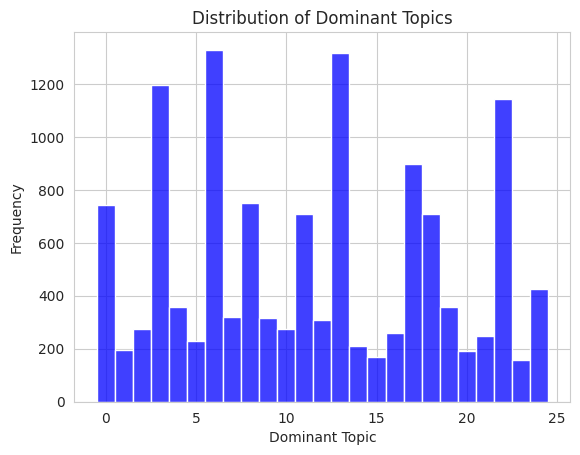

In [78]:
# Create the histogram
sns.histplot(data=df, x='Dominant_Topic', discrete=True, color='blue')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


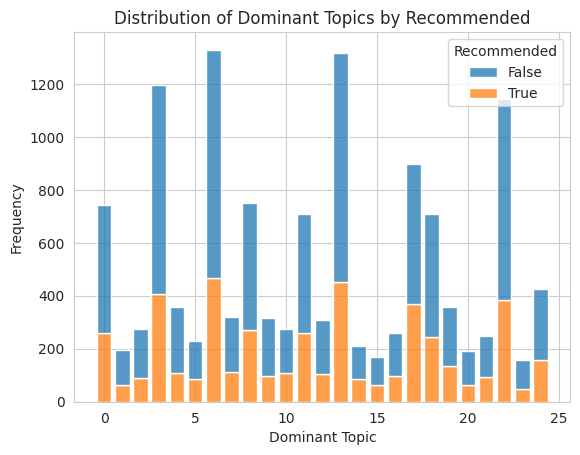

In [79]:
# Create the histogram as a bar chart with stacking by 'Seat Type'
sns.histplot(data=df, x='Dominant_Topic', hue='Recommended', multiple='stack', discrete=True, shrink=0.8, palette='tab10')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics by Recommended')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


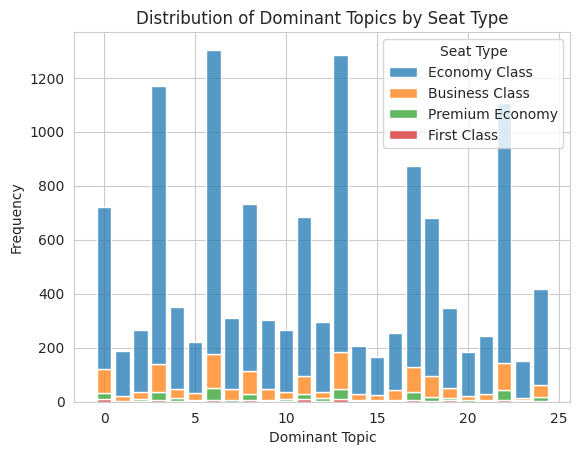

In [80]:
# Create the histogram as a bar chart with stacking by 'Seat Type'
sns.histplot(data=df, x='Dominant_Topic', hue='Seat Type', multiple='stack', discrete=True, shrink=0.8, palette='tab10')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics by Seat Type')
plt.show()

In [81]:
# Count the frequency of each dominant topic
topic_counts = df['Dominant_Topic'].value_counts().nlargest(5)

# Display the counts
print("Five Most Frequent Dominant Topics:")
print(topic_counts)

# Extract the keywords for the most frequent topics
keywords = df[df['Dominant_Topic'].isin(topic_counts.index)][['Dominant_Topic', 'Keywords']].drop_duplicates()

# Print the keywords for each of the top topics
print("\nKeywords for each of the top topics:")
for index, row in keywords.iterrows():
    print(f"Topic {row['Dominant_Topic']}: {row['Keywords']}")

Five Most Frequent Dominant Topics:
Dominant_Topic
6     1329
13    1317
3     1196
22    1143
17     897
Name: count, dtype: int64

Keywords for each of the top topics:
Topic 3: meal, drink, served, short, snack, offered, hot, lounge, efficient, coffee
Topic 13: hour, delayed, minute, 2, wait, departure, delay, arrived, 3, 1
Topic 17: luggage, pay, baggage, bag, extra, charge, checked, carry, hand, paid
Topic 22: crew, clean, service, staff, comfortable, helpful, overall, professional, really, pleasant
Topic 6: food, class, business, entertainment, inflight, premium, movie, screen, wifi, service


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# Calculate the average 'BERT_Sentiment' for each dominant topic
average_sentiments = df.groupby('Dominant_Topic')['BERT_Sentiment'].mean()

# Calculate the mean of the ratings for each dominant topic
average_ratings = df.groupby('Dominant_Topic')['Overall_Rating'].mean()

# Combine the two averages into a single DataFrame
combined_table = pd.DataFrame({
    'Average BERT Sentiment': average_sentiments,
    'Average Overall Rating': average_ratings
})

# Print the combined table
print("Combined Table of Average Sentiment and Ratings:")
print(combined_table)

Combined Table of Average Sentiment and Ratings:
                Average BERT Sentiment  Average Overall Rating
Dominant_Topic                                                
0                             2.040431                3.173854
1                             1.846939                3.132653
2                             1.833333                3.286232
3                             1.910535                2.940635
4                             1.848739                2.820728
5                             1.995671                3.212121
6                             1.900677                3.239278
7                             1.952978                3.131661
8                             1.910547                3.257677
9                             1.911392                2.829114
10                            2.007326                3.025641
11                            1.951977                3.196328
12                            1.957792                3.061688
13    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
combined_table.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Average BERT Sentiment,Average Overall Rating
count,25.000000,25.000000
mean,1.944149,3.165889
std,0.078969,0.189830
min,1.833333,2.820728
25%,1.900677,3.072616
50%,1.926509,3.148515
75%,1.995671,3.257677
max,2.122631,3.745283


We can see that all topics are rated similarly on average with very small standard deviation

In [84]:
# Get all unique values in the 'Seat Type' column
unique_seat_types = df['Seat Type'].unique()

# Print the unique values
print("Unique Seat Types:")
print(unique_seat_types)

Unique Seat Types:
['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Airline specific

In [85]:
# Count the frequency of each airline
airline_counts = df['Airline Name'].value_counts()

# Get the top five most reviewed airlines
top_five_airlines = airline_counts.head(5)

# Print the result
print("Top Five Most Reviewed Airlines:")
print(top_five_airlines)

Top Five Most Reviewed Airlines:
Airline Name
Aer Lingus            91
Jetblue Airways       89
CSA Czech Airlines    88
Hainan Airlines       88
Air Serbia            88
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Subsetting

In [86]:
# Filter the DataFrame for rows where the Airline column is 'Finnair'
Finnair_df = df[df['Airline Name'] == 'Finnair']

# To check the first few entries of the filtered DataFrame
print(Finnair_df.head())

      Unnamed: 0 Airline Name  Overall_Rating  \
7097        9389      Finnair               1   
7098        9390      Finnair               1   
7099        9391      Finnair               2   
7100        9392      Finnair               9   
7101        9393      Finnair               2   

                                       Review_Title Review Date  Verified  \
7097          "person at checking counter was rude"  2023-07-26      True   
7098    "service has deteriorated catastrophically"  2023-07-24      True   
7099          "first flag carrier low-cost airline"  2023-07-16      True   
7100                    "Perfect flying experience"  2023-07-14      True   
7101  "pretty much Ryanair but with twice the cost"  2023-06-30      True   

                                                 Review Type Of Traveller  \
7097   Booked extra bag, but upon checking they did ...      Solo Leisure   
7098   I upgraded my flight to business class and th...          Business   
7099    A f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


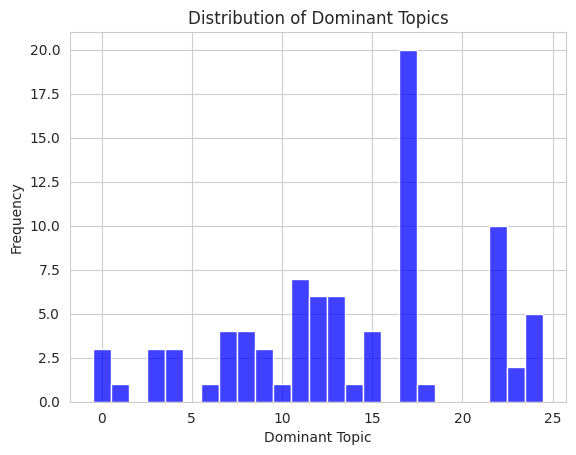

In [87]:
# Create the histogram
sns.histplot(data=Finnair_df, x='Dominant_Topic', discrete=True, color='blue')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics')

# Show the plot
plt.show()

In [88]:
# Calculate the average 'BERT_Sentiment' for each dominant topic
average_sentiments = df.groupby('Dominant_Topic')['BERT_Sentiment'].mean()

# Calculate the mean of the ratings for each dominant topic
average_ratings = df.groupby('Dominant_Topic')['Overall_Rating'].mean()

# Combine the two averages into a single DataFrame
combined_table = pd.DataFrame({
    'Average BERT Sentiment': average_sentiments,
    'Average Overall Rating': average_ratings
})

# Print the combined table
print("Combined Table of Average Sentiment and Ratings:")
print(combined_table)

Combined Table of Average Sentiment and Ratings:
                Average BERT Sentiment  Average Overall Rating
Dominant_Topic                                                
0                             2.040431                3.173854
1                             1.846939                3.132653
2                             1.833333                3.286232
3                             1.910535                2.940635
4                             1.848739                2.820728
5                             1.995671                3.212121
6                             1.900677                3.239278
7                             1.952978                3.131661
8                             1.910547                3.257677
9                             1.911392                2.829114
10                            2.007326                3.025641
11                            1.951977                3.196328
12                            1.957792                3.061688
13    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Descriptive Statistics for Overall Rating:
count    85.000000
mean      2.658824
std       2.552090
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       9.000000
Name: Overall_Rating, dtype: float64


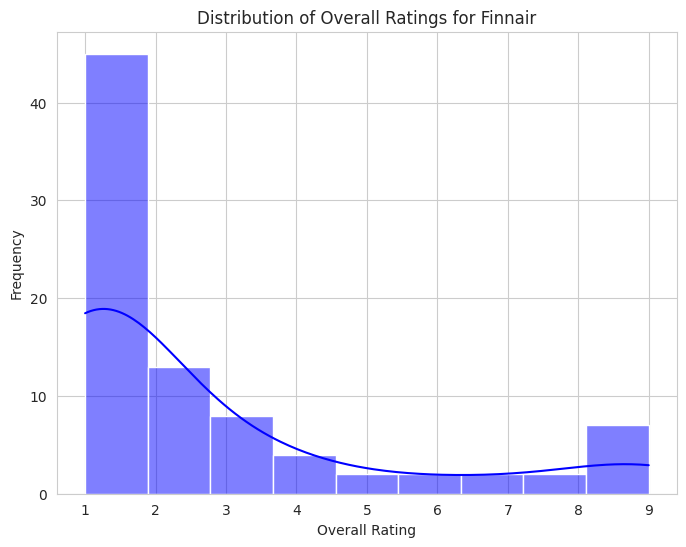

In [89]:
# Display basic descriptive statistics
print("Descriptive Statistics for Overall Rating:")
print(Finnair_df['Overall_Rating'].describe())

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(Finnair_df['Overall_Rating'], kde=True, color='blue')  # KDE provides a smooth curve over the histogram

# Add labels and title
plt.title('Distribution of Overall Ratings for Finnair')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Frequent Topics

In [90]:
# Filter reviews with an Overall Rating of 1
rating_one_reviews = Finnair_df[Finnair_df['Overall_Rating'] == 1]

# Count the frequency of each dominant topic
dominant_topic_counts = rating_one_reviews['Dominant_Topic'].value_counts()

# Print the most frequent dominant topics
print("Most Frequent Dominant Topics for Overall Rating of 1:")
print(dominant_topic_counts.head())  # Adjust the number in head() if you want more or fewer top topics

Most Frequent Dominant Topics for Overall Rating of 1:
Dominant_Topic
17    9
22    6
12    4
13    4
11    3
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### High and Low Scoring Topics

In [91]:
# Filter reviews with an Overall Rating of 1
rating_one_reviews = Finnair_df[Finnair_df['Overall_Rating'] == 1]

# Count the frequency of each dominant topic
dominant_topic_counts = rating_one_reviews['Dominant_Topic'].value_counts().head(5)

# Get the keywords for the top topics
# Ensure that each topic only has one set of keywords by dropping duplicates
keywords_mapping = rating_one_reviews[['Dominant_Topic', 'Keywords']].drop_duplicates()

# Create a DataFrame to hold the top topics and their counts
top_topics_df = pd.DataFrame({
    'Dominant_Topic': dominant_topic_counts.index,
    'Frequency': dominant_topic_counts.values
})

# Merge the top topics DataFrame with the keywords
top_topics_keywords = pd.merge(top_topics_df, keywords_mapping, on='Dominant_Topic', how='left')

# Print the combined table
print("Top Dominant Topics with Keywords for Overall Rating of 1:")
print(top_topics_keywords)

Top Dominant Topics with Keywords for Overall Rating of 1:
   Dominant_Topic  Frequency  \
0              17          9   
1              22          6   
2              12          4   
3              13          4   
4              11          3   

                                            Keywords  
0  luggage, pay, baggage, bag, extra, charge, che...  
1  crew, clean, service, staff, comfortable, help...  
2  delay, changed, reason, ticket, time, 4, expen...  
3  hour, delayed, minute, 2, wait, departure, del...  
4  ticket, refund, money, change, month, book, tr...  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Filter reviews with an Overall Rating of 1
rating_one_reviews = Finnair_df[Finnair_df['Overall_Rating'] == 9]

# Count the frequency of each dominant topic
dominant_topic_counts = rating_one_reviews['Dominant_Topic'].value_counts().head(5)

# Get the keywords for the top topics
# Ensure that each topic only has one set of keywords by dropping duplicates
keywords_mapping = rating_one_reviews[['Dominant_Topic', 'Keywords']].drop_duplicates()

# Create a DataFrame to hold the top topics and their counts
top_topics_df = pd.DataFrame({
    'Dominant_Topic': dominant_topic_counts.index,
    'Frequency': dominant_topic_counts.values
})

# Merge the top topics DataFrame with the keywords
top_topics_keywords = pd.merge(top_topics_df, keywords_mapping, on='Dominant_Topic', how='left')

# Print the combined table
print("Top Dominant Topics with Keywords for Overall Rating of 1:")
print(top_topics_keywords)

Top Dominant Topics with Keywords for Overall Rating of 1:
   Dominant_Topic  Frequency  \
0              17          4   
1               6          1   
2              14          1   
3              22          1   

                                            Keywords  
0  luggage, pay, baggage, bag, extra, charge, che...  
1  food, class, business, entertainment, inflight...  
2  family, didnt, ask, child, travelling, togethe...  
3  crew, clean, service, staff, comfortable, help...  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Mapping

In [93]:
# Calculate the frequency of each dominant topic
topic_frequency = Finnair_df['Dominant_Topic'].value_counts().reset_index()
topic_frequency.columns = ['Dominant_Topic', 'Frequency']

# Calculate the average overall rating for each dominant topic
average_rating = Finnair_df.groupby('Dominant_Topic')['Overall_Rating'].mean().reset_index()
average_rating.columns = ['Dominant_Topic', 'Average_Overall_Rating']  # Ensuring correct column names

# Merge the frequency and average rating data
topic_data = pd.merge(topic_frequency, average_rating, on='Dominant_Topic')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


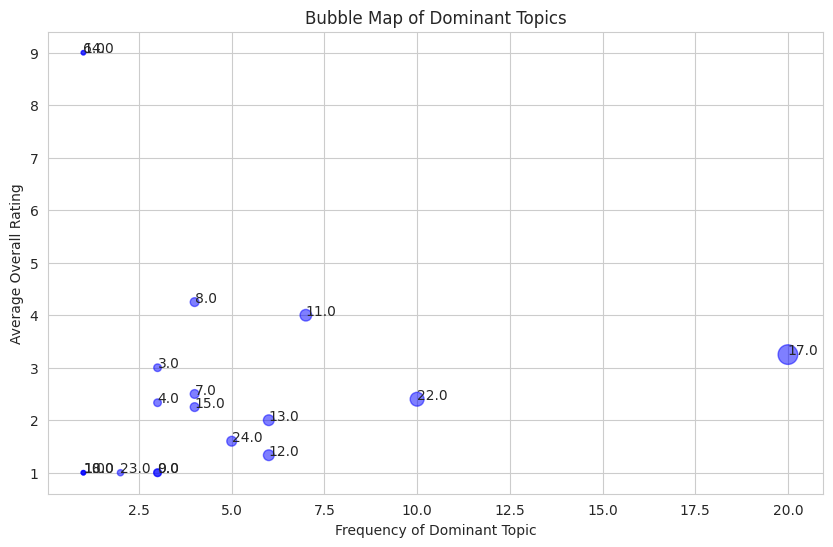

In [94]:
# Create a bubble map
plt.figure(figsize=(10, 6))
bubble_sizes = topic_data['Frequency'] * 10  # Adjust bubble size scale factor as needed

plt.scatter(topic_data['Frequency'], topic_data['Average_Overall_Rating'],
            s=bubble_sizes,  # Bubble sizes
            alpha=0.5, color='blue')

# Add labels and title
plt.title('Bubble Map of Dominant Topics')
plt.xlabel('Frequency of Dominant Topic')
plt.ylabel('Average Overall Rating')

# Optional: Add annotations for each bubble to show the Dominant Topic
for i, row in topic_data.iterrows():
    plt.text(row['Frequency'], row['Average_Overall_Rating'], str(row['Dominant_Topic']))

# Show plot
plt.show()

### Feature Distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No labels found for legend.


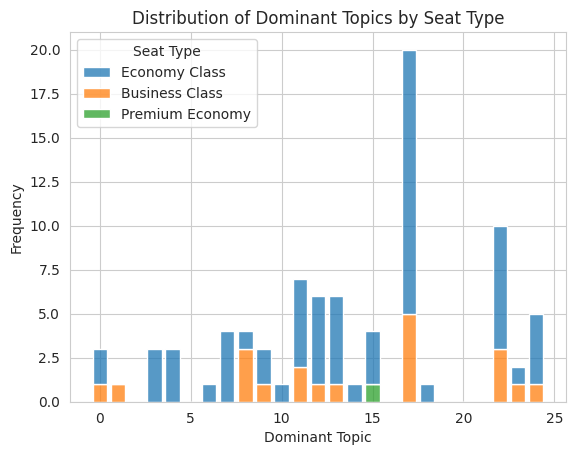

In [95]:
# Exclude rows where 'Seat Type' is NaN
filtered_df = Finnair_df.dropna(subset=['Seat Type'])

# Create the histogram as a bar chart with stacking by 'Seat Type'
plot = sns.histplot(data=filtered_df, x='Dominant_Topic', hue='Seat Type', multiple='stack', discrete=True, shrink=0.8, palette='tab10')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics by Seat Type')

# Explicitly adding a legend if it's not automatically detected
handles, labels = plot.get_legend_handles_labels()
if labels:
    plt.legend(handles=handles, labels=labels, title='Seat Type', loc='best')
else:
    print("No labels found for legend.")
# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No labels found for legend.


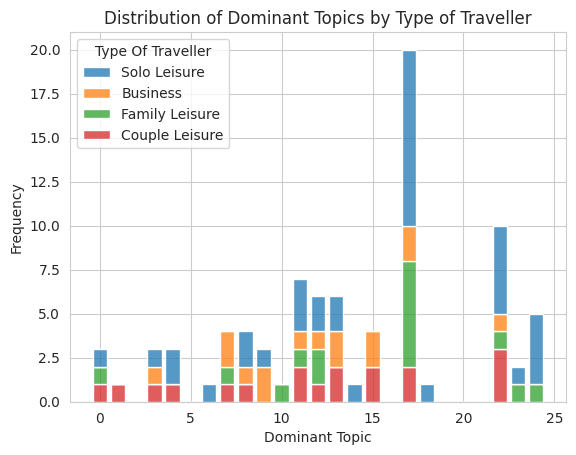

In [96]:
# Exclude rows where 'Type Of Traveller' is NaN
filtered_df = Finnair_df.dropna(subset=['Type Of Traveller'])

# Create the histogram as a bar chart with stacking by 'Type Of Traveller'
plot = sns.histplot(data=filtered_df, x='Dominant_Topic', hue='Type Of Traveller', multiple='stack', discrete=True, shrink=0.8, palette='tab10')

# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics by Type of Traveller')

# Explicitly adding a legend if it's not automatically detected
handles, labels = plot.get_legend_handles_labels()
if labels:
    plt.legend(handles=handles, labels=labels, title='Type of Traveller', loc='best')
else:
    print("No labels found for legend.")

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


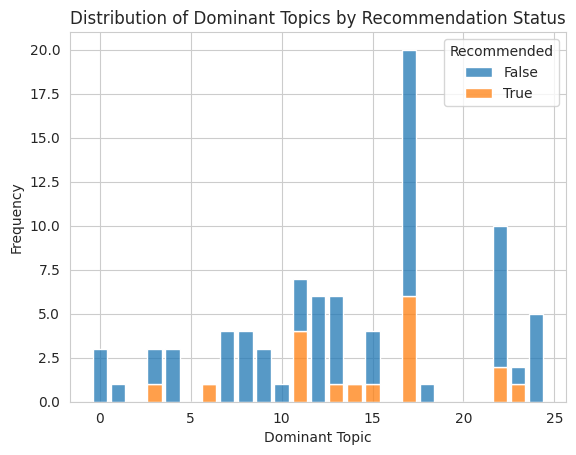

In [97]:
# Exclude rows where 'Recommended' is NaN
filtered_df = Finnair_df.dropna(subset=['Recommended'])  # Adjust column name as necessary

# Create the histogram as a bar chart with stacking by 'Recommended'
plot = sns.histplot(data=filtered_df, x='Dominant_Topic', hue='Recommended', multiple='stack', discrete=True, shrink=0.8, palette='tab10')
# Add labels and title
plt.xlabel('Dominant Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Dominant Topics by Recommendation Status')
# Explicitly adding a legend if it's not automatically detected
handles, labels = plot.get_legend_handles_labels()
if labels:
    plt.legend(handles=handles, labels=labels, title='Recommended', loc='best')
# Show the plot
plt.show()

In [98]:
# Filter the DataFrame to find the rows where 'Dominant_Topic' is 6
topic_keywords = Finnair_df[Finnair_df['Dominant_Topic'] == 6]['Keywords']

# Since keywords for a topic are likely the same for all entries, get the unique entries to avoid repetition
unique_keywords = topic_keywords.unique()

# Print the keywords for Topic 6
print("Keywords for Topic 6:")
for keywords in unique_keywords:
    print(keywords)

Keywords for Topic 6:
food, class, business, entertainment, inflight, premium, movie, screen, wifi, service


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Exploration

In [99]:
# Prepare the DataFrame (ensure there's no missing values in the necessary columns)
filtered_df = filtered_df.dropna(subset=['Dominant_Topic', 'Keywords', 'Overall_Rating', 'Recommended'])

# Create unique topics for dropdown options
topics = filtered_df['Dominant_Topic'].unique()
dropdown = widgets.Dropdown(options=topics, description='Topic:')

# Output widget for the display
output = Output()

# Handler for dropdown value change
def dropdown_eventhandler(change):
    output.clear_output(wait=True)  # Ensure old content is cleared
    with output:
        topic_selected = change.new
        # Filter the DataFrame for the selected topic
        topic_df = filtered_df[filtered_df['Dominant_Topic'] == topic_selected]
        # Attempt to get keywords - assumes keywords are the same for all entries of the topic
        keywords = topic_df['Keywords'].iloc[0]
        print(f"Keywords for Topic {topic_selected}: {keywords}")

        # Create histogram of reviews based on Overall Rating with hue 'Recommended'
        fig = px.histogram(topic_df, x='Overall_Rating', color='Recommended',
                           title=f"Reviews Distribution for Topic {topic_selected}",
                           labels={'count': 'Number of Reviews', 'Overall_Rating': 'Overall Rating'},
                           barmode='group',
                           color_discrete_map={'True': 'blue', 'False': 'red'})  # Explicit color mapping
        fig.show()

# Listen to changes in the dropdown
dropdown.observe(dropdown_eventhandler, names='value')

# Display widgets
display(dropdown, output)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dropdown(description='Topic:', options=(12, 9, 24, 6, 17, 18, 15, 14, 7, 11, 13, 0, 22, 4, 23, 3, 8, 10, 1), v…

Output()

## Predicting Referral

In [100]:
# General imports for data handling and computation
import pandas as pd
import numpy as np

# Machine Learning tools from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# TensorFlow and Keras for building neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
df = pd.read_csv('Airline_Final.csv') # Ensure CSV is in the same directory as this script

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Type Of Traveller,Seat Type,Route,...,Recommended,Cleaned Review,Word Count,Year,SWN_Sentiment,BERT_Sentiment,Document_No,Dominant_Topic_Percentage,Dominant_Topic,Keywords
0,0,AB Aviation,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,Moroni to Moheli,...,True,turned pretty decent airline online booking wo...,29,2019,3.250,3,0,0.2155,24,"check, checkin, counter, online, airport, boar..."
1,1,AB Aviation,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,Moroni to Anjouan,...,False,small airline ticket advised turn 0800hrs conf...,46,2019,-2.125,1,1,0.1614,12,"delay, changed, reason, ticket, time, 4, expen..."
2,2,AB Aviation,1,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,...,False,small airline airline based checkin disorganis...,31,2019,0.125,2,2,0.2163,3,"meal, drink, served, short, snack, offered, ho..."
3,3,Adria Airways,1,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,Solo Leisure,Economy Class,Frankfurt to Pristina,...,False,please favor fly route july 2019 lost luggage ...,61,2019,-4.375,1,3,0.1624,19,"call, lost, number, called, someone, im, back,..."
4,4,Adria Airways,1,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,...,False,book flight airline friend returned september ...,50,2019,-1.125,1,4,0.2166,0,"email, cancelled, received, week, sent, booked..."


In [103]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money', 'Recommended',
       'Cleaned Review', 'Word Count', 'Year', 'SWN_Sentiment',
       'BERT_Sentiment', 'Document_No', 'Dominant_Topic_Percentage',
       'Dominant_Topic', 'Keywords'],
      dtype='object')

In [104]:
# Show current split in Recommended columnn
print(df['Recommended'].value_counts())

# Convert recommended column to binary from "False" and "True
df['Recommended'] = df['Recommended'].astype(int)

Recommended
False    8461
True     4625
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# To ensure that the model is not biased towards the majority class, we will use the SMOTE technique to balance the classes

# Only keep feature and target columns
X = df[['SWN_Sentiment', 'BERT_Sentiment', 'Dominant_Topic', 'Dominant_Topic_Percentage']]
y = df['Recommended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Normalizing data after data splitting to prevent data leakage
scaler = MinMaxScaler()
X_train[['SWN_Sentiment', 'BERT_Sentiment']] = scaler.fit_transform(X_train[['SWN_Sentiment', 'BERT_Sentiment']])
X_test[['SWN_Sentiment', 'BERT_Sentiment']] = scaler.transform(X_test[['SWN_Sentiment', 'BERT_Sentiment']])

print(y_train.value_counts())

print(X_train.head())

Recommended
0    6731
1    6731
Name: count, dtype: int64
   SWN_Sentiment  BERT_Sentiment  Dominant_Topic  Dominant_Topic_Percentage
0       0.439614            0.00              17                     0.4115
1       0.502415            0.50               6                     0.1607
2       0.347826            0.00              17                     0.3226
3       0.357488            0.00              17                     0.5828
4       0.429952            0.75              22                     0.4575


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
# Model 1) - Logistic Regression
# Create the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the target values
y_pred_LR = log_reg.predict(X_test)

# Evaluate the model using confusion matrix and classification report
print("Logistic Regression")
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_LR) * 100))
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

Logistic Regression
Accuracy: 87.59%
[[1598  132]
 [ 193  695]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1730
           1       0.84      0.78      0.81       888

    accuracy                           0.88      2618
   macro avg       0.87      0.85      0.86      2618
weighted avg       0.87      0.88      0.87      2618



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
# Model 2) - Support Vector Machine
# Create the model
svm = SVC(random_state=42)

# Fit the model
svm.fit(X_train, y_train)

# Predict the target values
y_pred_SVM = svm.predict(X_test)

# Evaluate the model using confusion matrix and classification report
print("Support Vector Machine")
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_SVM) * 100))
print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Support Vector Machine
Accuracy: 86.97%
[[1611  119]
 [ 222  666]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1730
           1       0.85      0.75      0.80       888

    accuracy                           0.87      2618
   macro avg       0.86      0.84      0.85      2618
weighted avg       0.87      0.87      0.87      2618



In [108]:
# Model 3) - Random Forest
# Create the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the target values
y_pred_RF = rf.predict(X_test)

# Evaluate the model using confusion matrix and classification report
print("Random Forest")
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_RF) * 100))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest
Accuracy: 85.18%
[[1533  197]
 [ 191  697]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1730
           1       0.78      0.78      0.78       888

    accuracy                           0.85      2618
   macro avg       0.83      0.84      0.83      2618
weighted avg       0.85      0.85      0.85      2618



In [109]:
# Model 4) - Neural Network
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict the target values
y_pred_NN = model.predict(X_test)

# Apply threshold to convert continuous predictions to binary values
y_pred_Binary = (y_pred_NN > 0.5).astype(int)

# Evaluate the model using confusion matrix and classification report
print("Neural Network")
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred_Binary) * 100))
print(confusion_matrix(y_test, y_pred_Binary))
print(classification_report(y_test, y_pred_Binary))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
421/421 [==============================] - 5s 3ms/step - loss: 0.6955 - accuracy: 0.6405
Epoch 2/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4492 - accuracy: 0.8290
Epoch 3/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8428
Epoch 4/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8478
Epoch 5/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8495
Epoch 6/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8524
Epoch 7/10
421/421 [==============================] - 1s 3ms/step - loss: 0.4065 - accuracy: 0.8503
Epoch 8/10
421/421 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8522
Epoch 9/10
421/421 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8514
Epoch 10/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8697
T

In [110]:
# Flatten y_pred_NN to a 1D array
y_pred_NN = y_pred_NN.flatten()

# Create Ensemble based on the four models
final_pred = (y_pred_LR + y_pred_SVM + y_pred_RF + y_pred_NN) / 4

# Apply threshold to convert continuous predictions to binary values
final_preds = (final_pred > 0.5).astype(int)

# Evaluate the ensemble using confusion matrix and classification report
print("Ensemble")
print("Accuracy: %.2f%%" % (accuracy_score(y_test, final_preds) * 100))
print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))

Ensemble
Accuracy: 87.24%
[[1595  135]
 [ 199  689]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1730
           1       0.84      0.78      0.80       888

    accuracy                           0.87      2618
   macro avg       0.86      0.85      0.86      2618
weighted avg       0.87      0.87      0.87      2618



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
